# Plotting Sequencing Error Rates at each nucleotide position for each type of tRNA isodecoder


After reads processing by bam-readcount (https://github.com/genome/bam-readcount), low-level information at each nucleotide position for reads mapped to each tRNA isodecoder reference sequence was summarised, such as proportion of different nucleotides mapped at each nt position. The codes in this doc is to process the output from bam-readcount programme and make plots.



----------------------------------------------------------------------------------------
- Load required packages

----------------------------------------------------------------------------------------

In [3]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

----------------------------------------------------------------------------------------
- store each tRNA isodecoder reference sequence and save as a list of strings with each nucleotide base

----------------------------------------------------------------------------------------

In [4]:
# create container
tRNA_sequence = {}

# 
tRNA_sequence['tRNA-Gly-GCC-1'] = 'GCATGGGTGGTTCAGTGGTAGAATTCTCGCCTGCCACGCGGGAGGCCCGGGTTCGATTCCCGGCCCATGCA'
tRNA_sequence['tRNA-Gly-GCC-1'] = [*tRNA_sequence['tRNA-Gly-GCC-1']]
tRNA_sequence['tRNA-Gly-GCC-2'] = 'GCATTGGTGGTTCAGTGGTAGAATTCTCGCCTGCCACGCGGGAGGCCCGGGTTCGATTCCCGGCCAATGCA'
tRNA_sequence['tRNA-Gly-GCC-2'] = [*tRNA_sequence['tRNA-Gly-GCC-2']]
tRNA_sequence['tRNA-Gly-GCC-3'] = 'GCATTGGTGGTTCAGTGGTAGAATTCTCGCCTGCCACGCGGGAGGCCCGGGTTTGATTCCCGGCCAGTGCA'
tRNA_sequence['tRNA-Gly-GCC-3'] = [*tRNA_sequence['tRNA-Gly-GCC-3']]
tRNA_sequence['tRNA-Gly-GCC-4'] = 'GCATAGGTGGTTCAGTGGTAGAATTCTTGCCTGCCACGCAGGAGGCCCAGGTTTGATTCCTGGCCCATGCA'
tRNA_sequence['tRNA-Gly-GCC-4'] = [*tRNA_sequence['tRNA-Gly-GCC-4']]
tRNA_sequence['tRNA-Gly-GCC-5'] = 'GCATTGGTGGTTCAGTGGTAGAATTCTCGCCTGCCATGCGGGCGGCCGGGCTTCGATTCCTGGCCAATGCA'
tRNA_sequence['tRNA-Gly-GCC-5'] = [*tRNA_sequence['tRNA-Gly-GCC-5']]
tRNA_sequence['tRNA-Gly-CCC-1'] = 'GCATTGGTGGTTCAGTGGTAGAATTCTCGCCTCCCACGCGGGAGaCCCGGGTTCAATTCCCGGCCAATGCA'
tRNA_sequence['tRNA-Gly-CCC-1'] = [*tRNA_sequence['tRNA-Gly-CCC-1']]
tRNA_sequence['tRNA-Gly-CCC-2'] = 'GCGCCGCTGGTGTAGTGGTATCATGCAAGATTCCCATTCTTGCGaCCCGGGTTCGATTCCCGGGCGGCGCA'
tRNA_sequence['tRNA-Gly-CCC-2'] = [*tRNA_sequence['tRNA-Gly-CCC-2']]
tRNA_sequence['tRNA-Gly-CCC-3'] = 'GCATTGGTGGTTCAATGGTAGAATTCTCGCCTCCCACGCAGGAGaCCCAGGTTCGATTCCTGGCCAATGCA'
tRNA_sequence['tRNA-Gly-CCC-3'] = [*tRNA_sequence['tRNA-Gly-GCC-3']]

----------------------------------------------------------------------------------------
Loop over each batch and sample and tRNA isodecoder type, to:
- calculate error rate at each base position and save in a new dictionary 
- save sequencing depth information at each base position to a new dictionary
- make plots of Control and THUMPD3_ko with error rate at each base position and save into png files

----------------------------------------------------------------------------------------

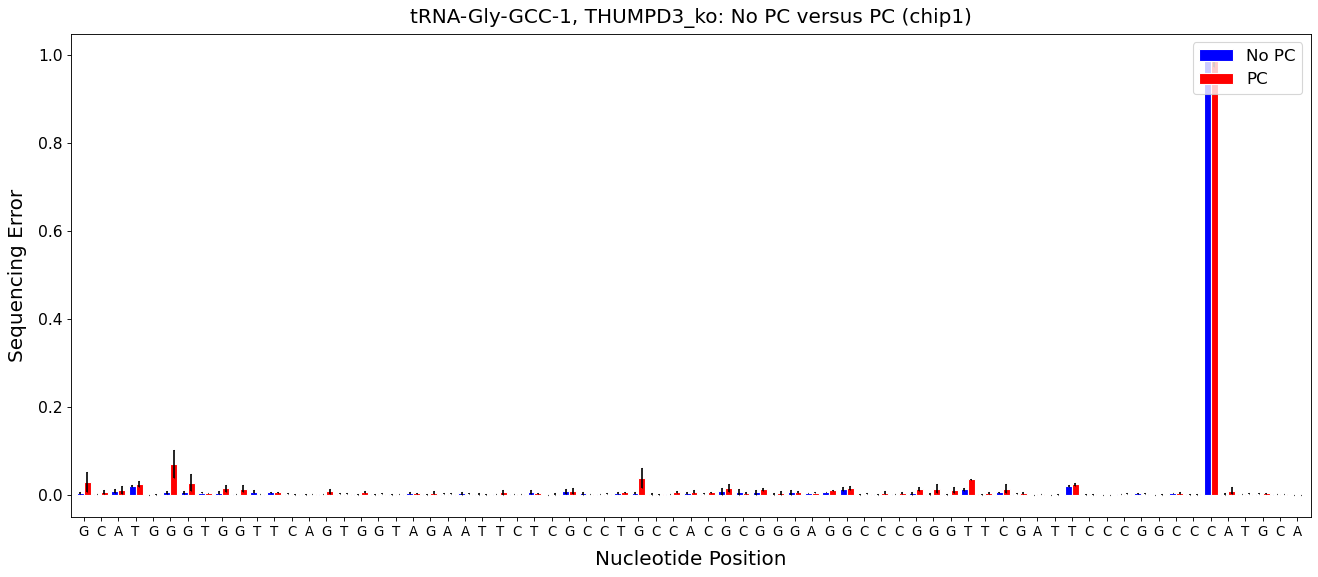

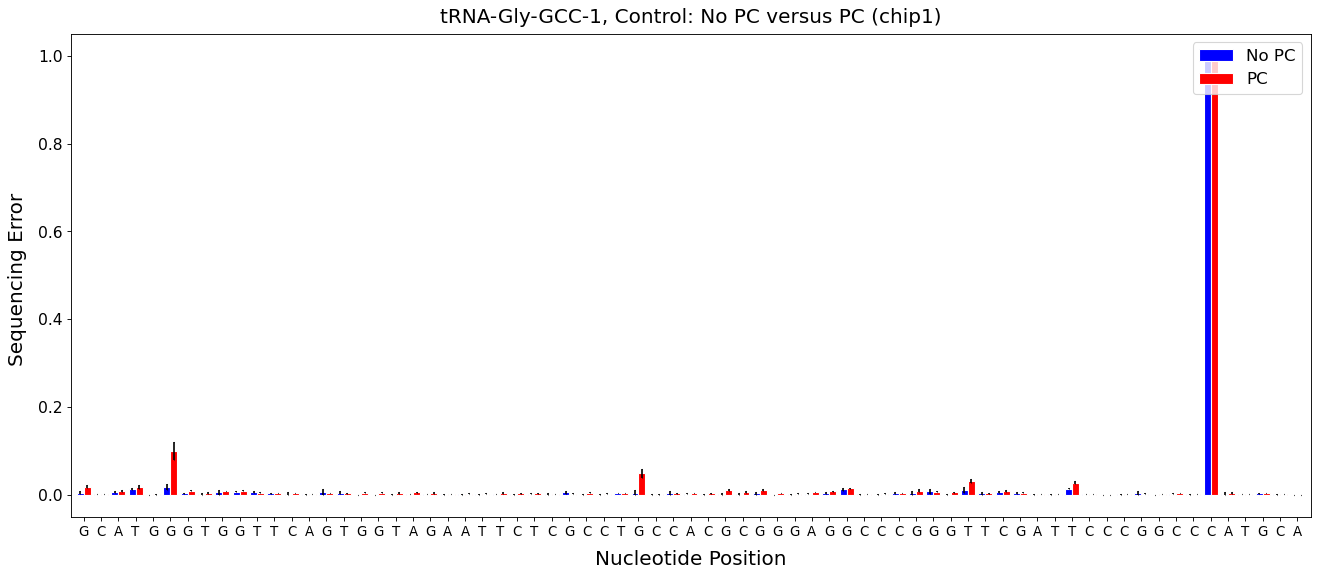

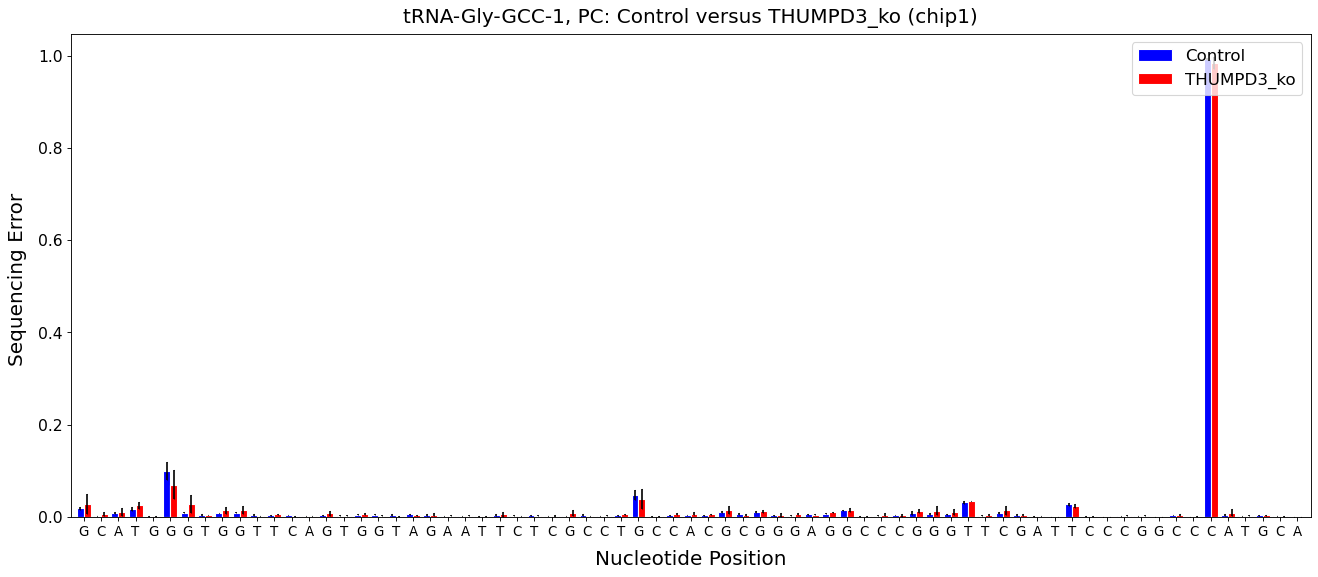

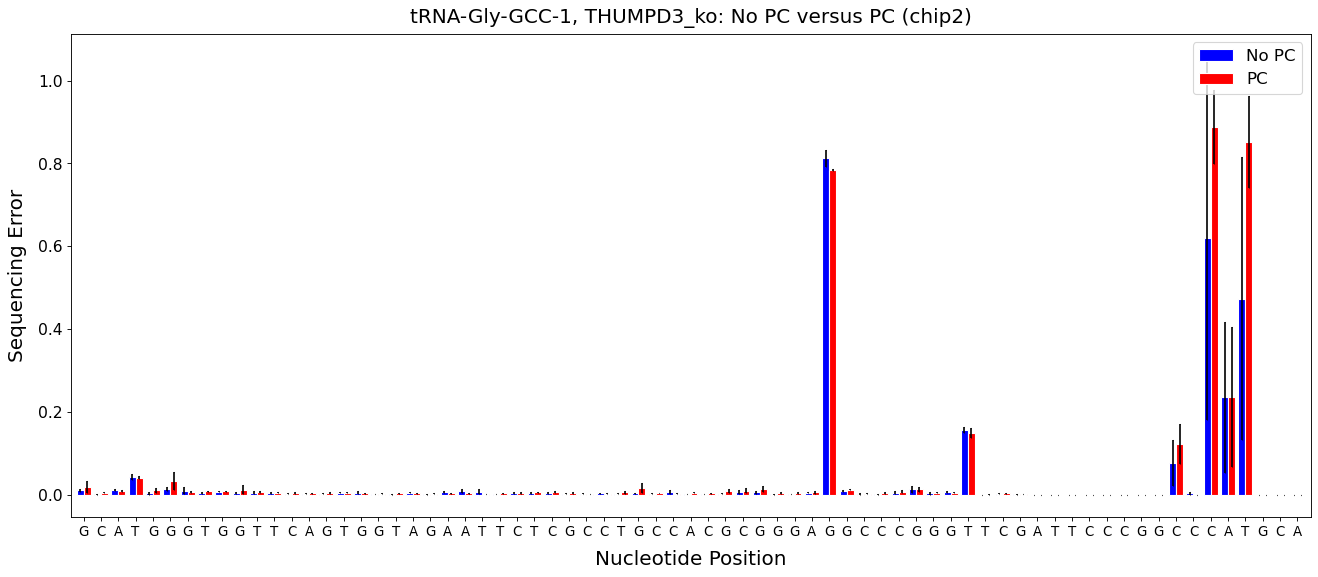

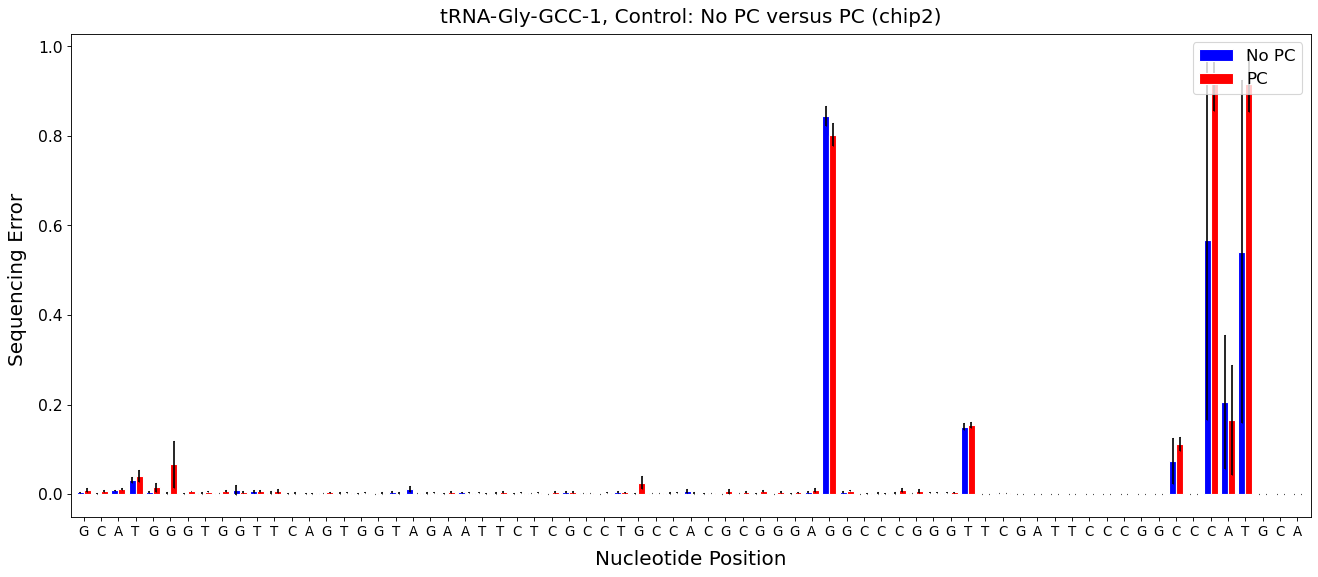

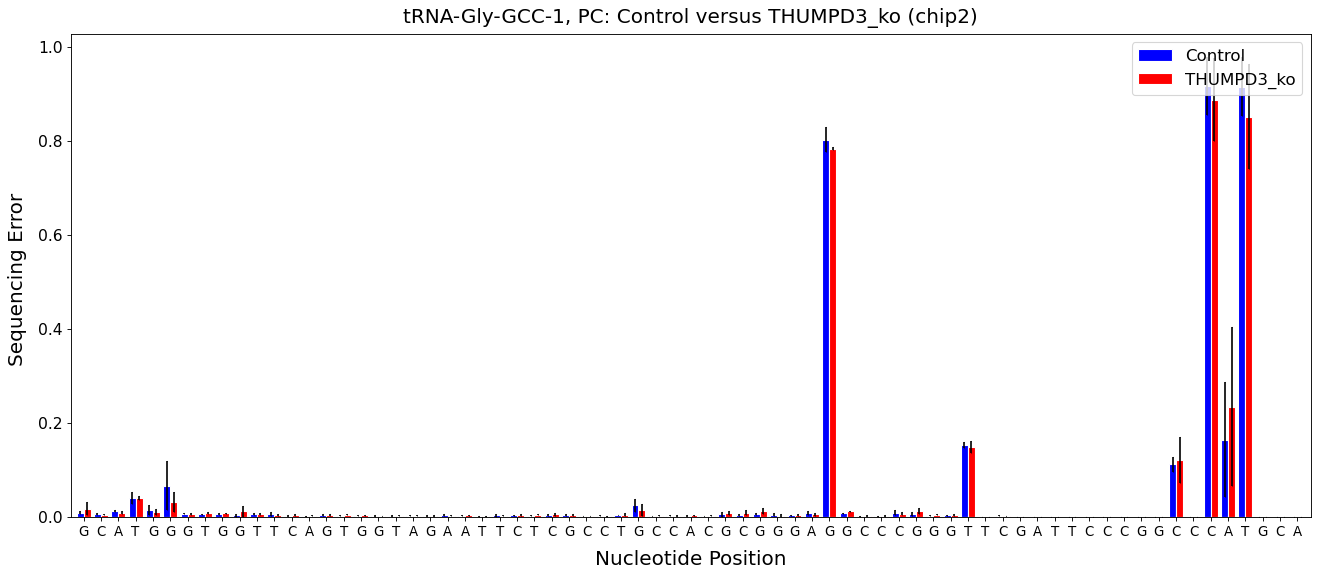

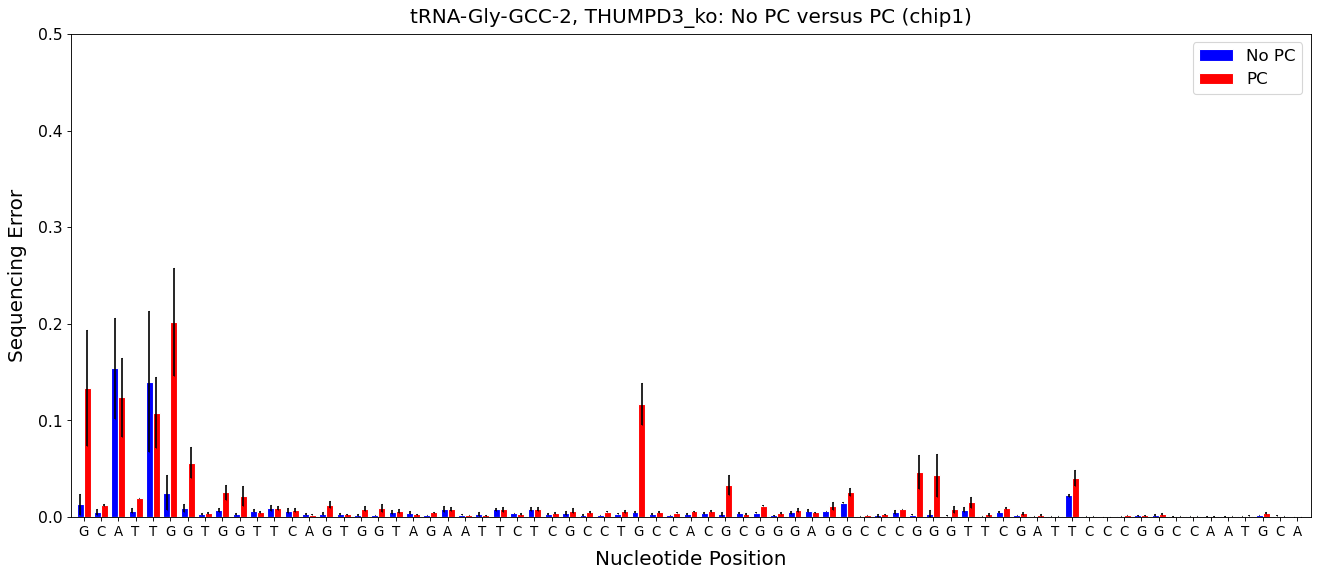

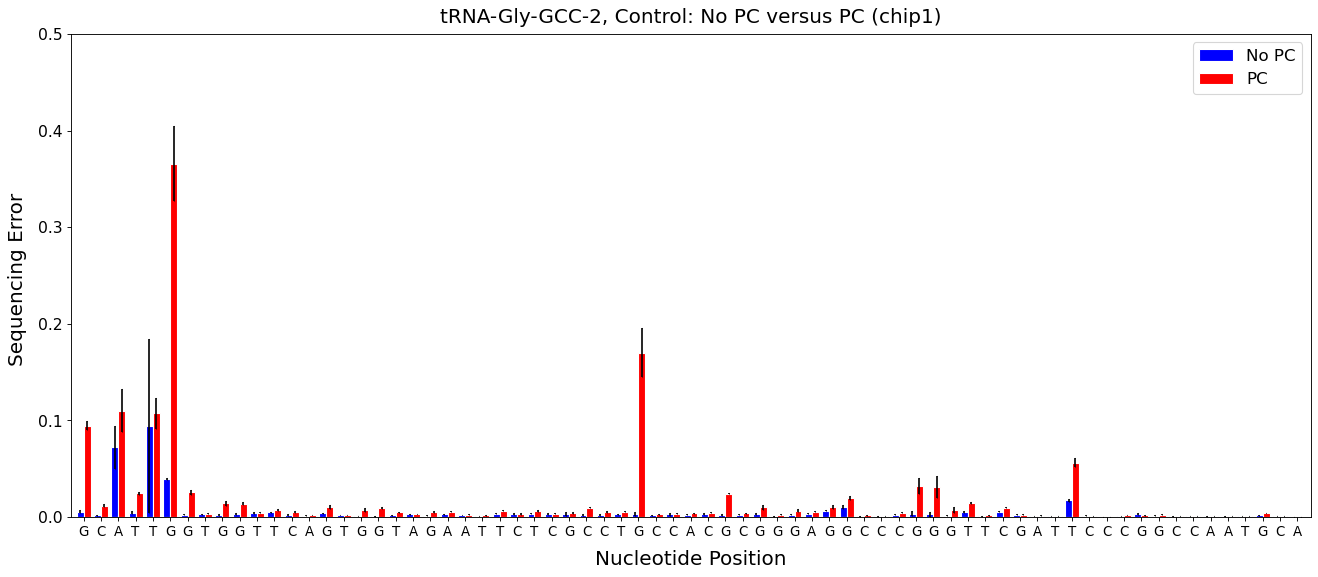

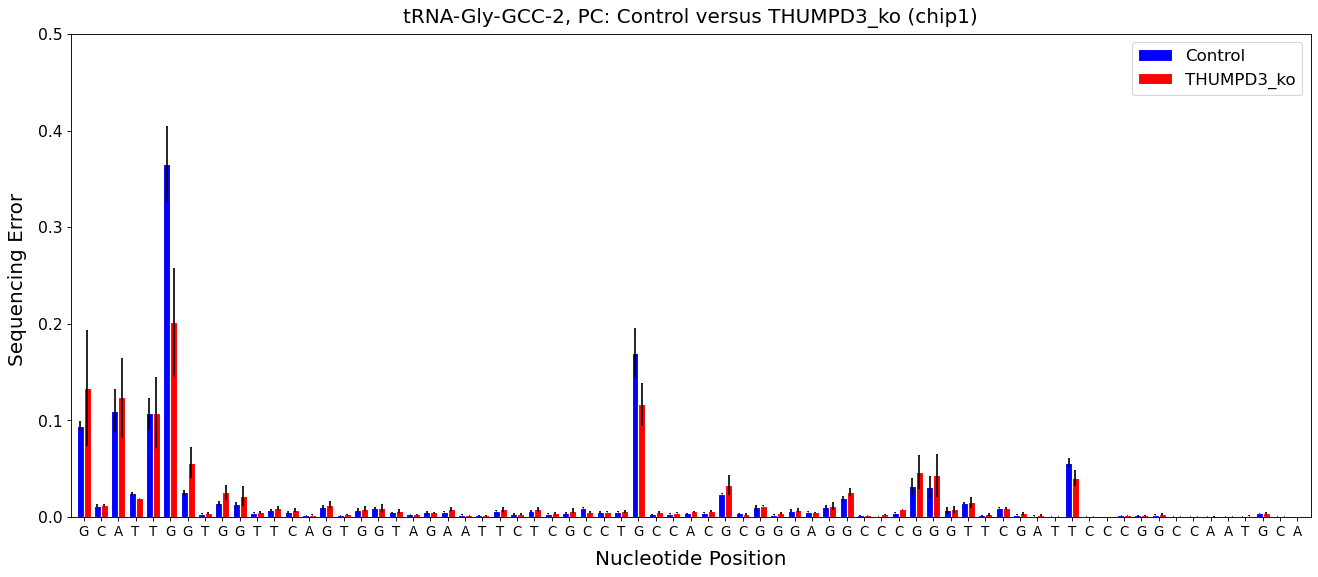

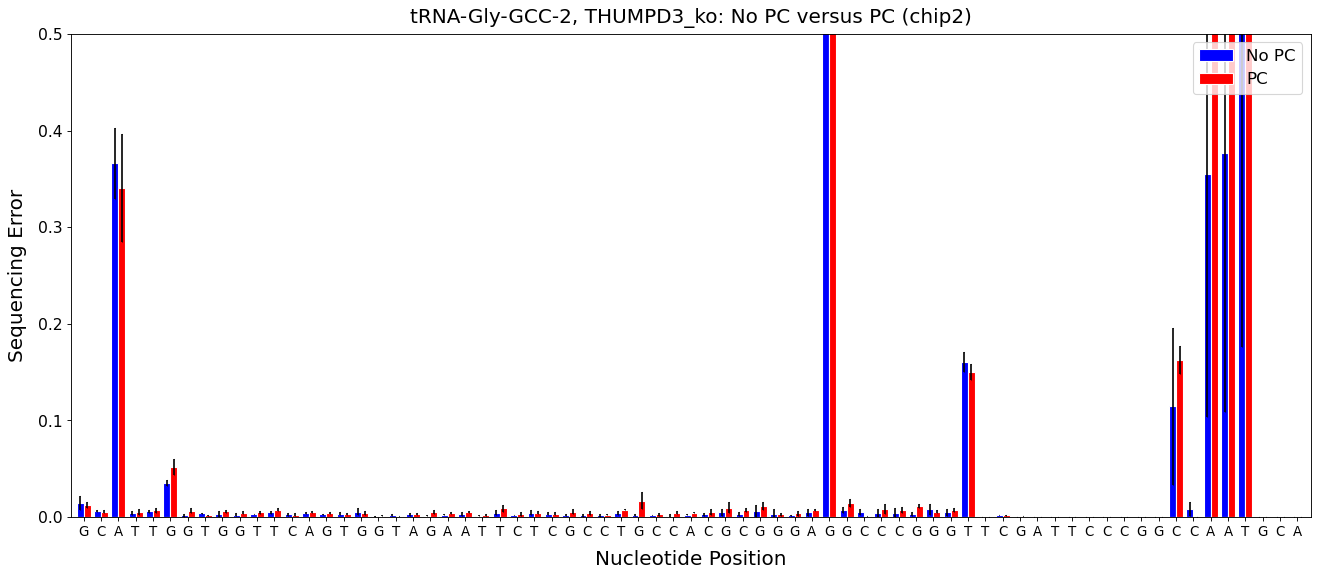

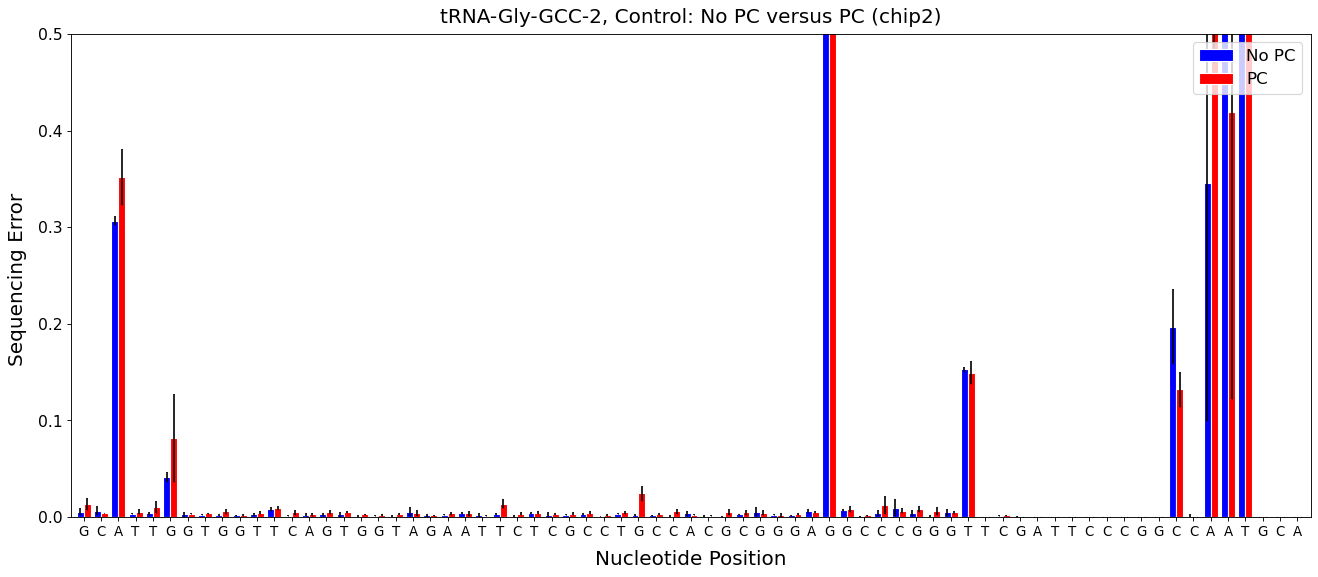

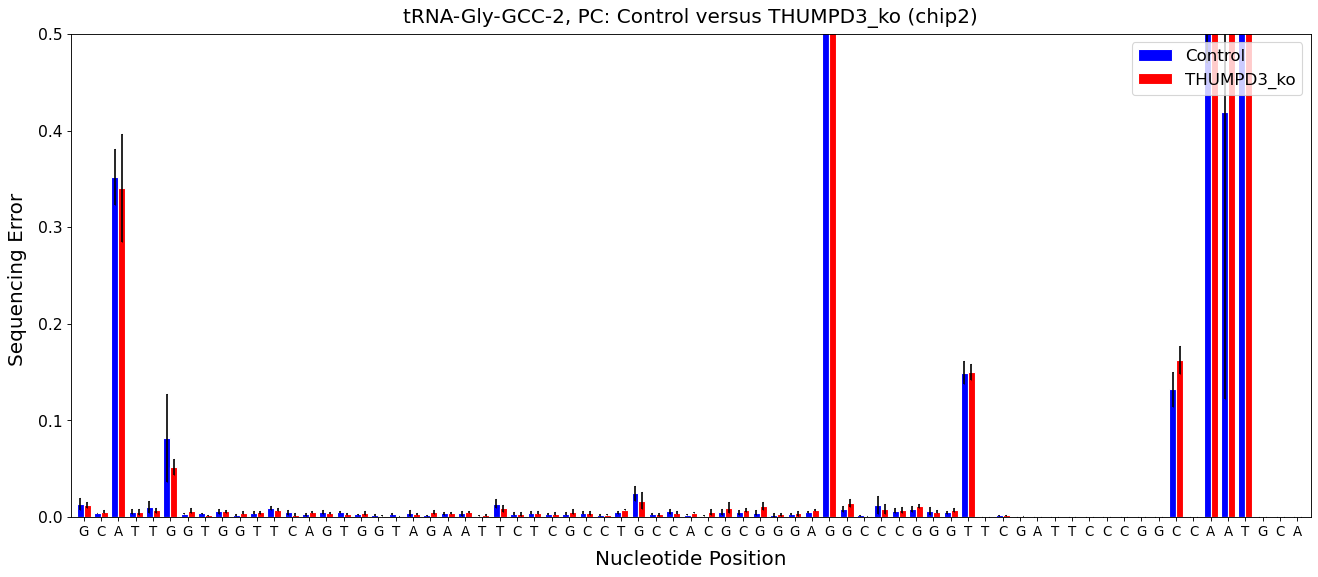

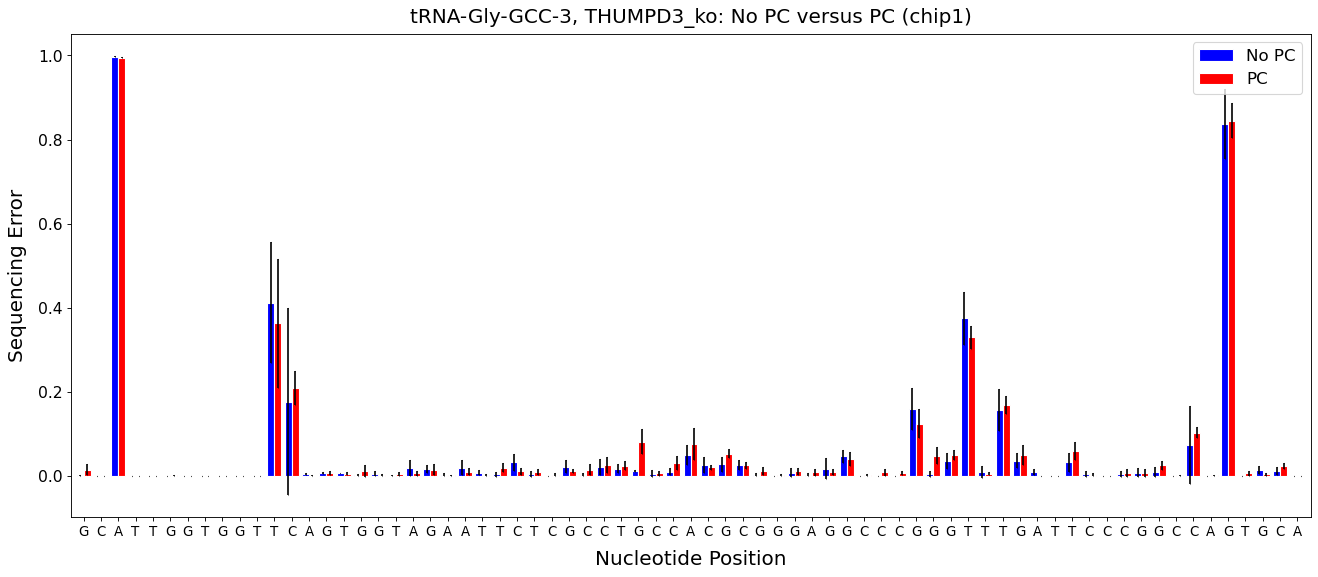

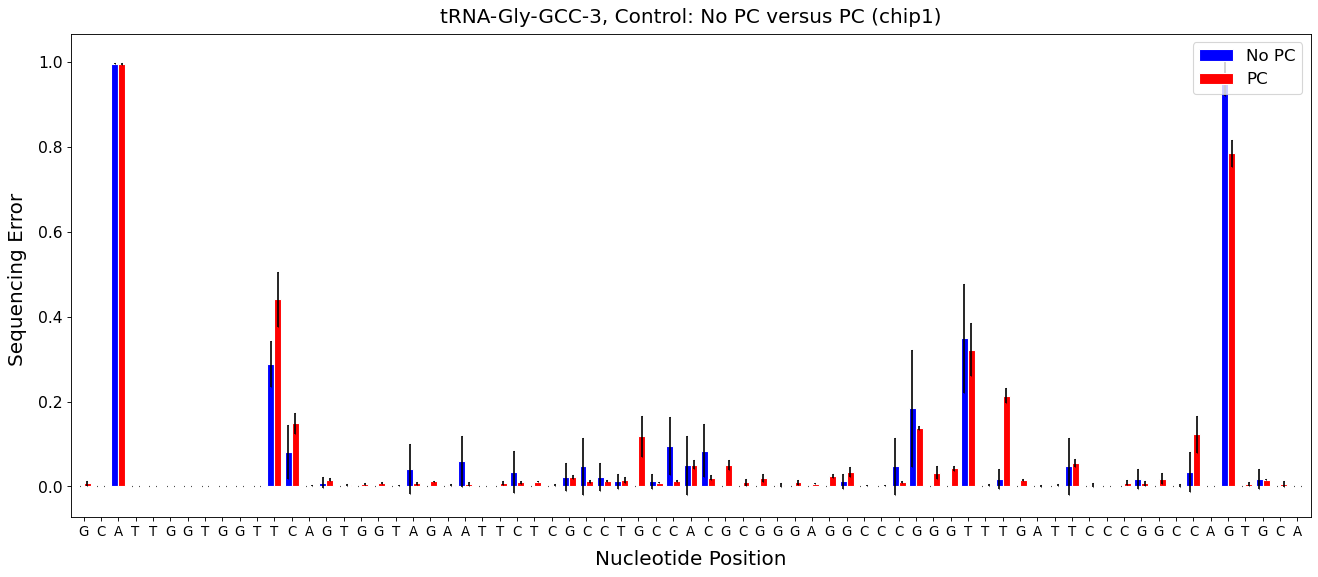

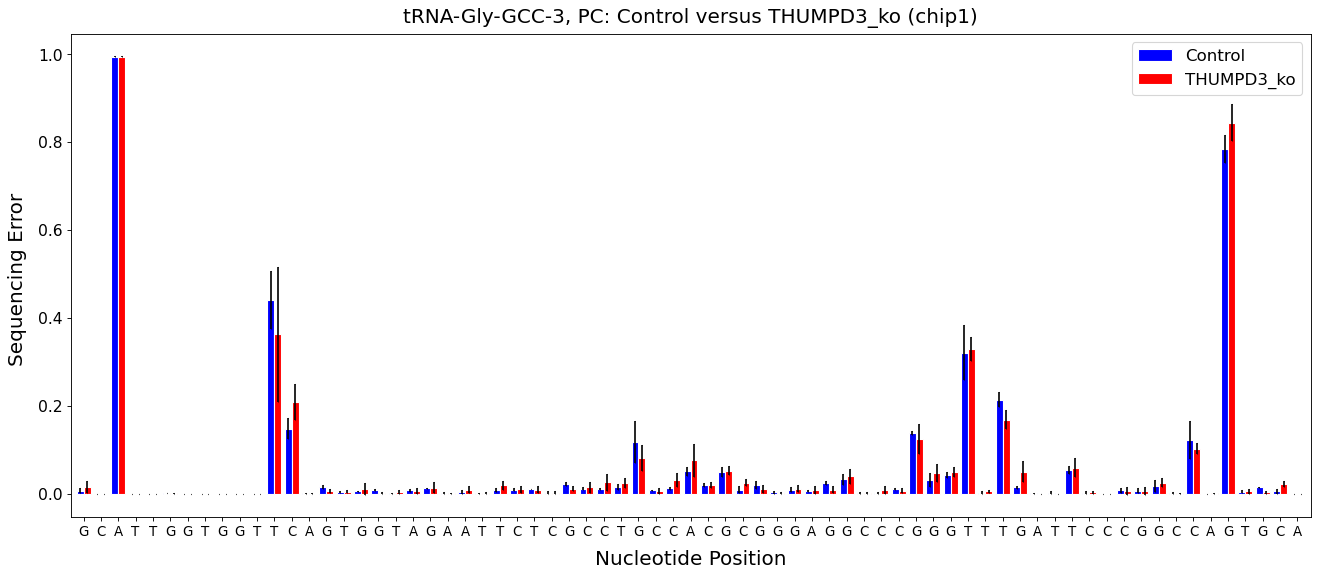

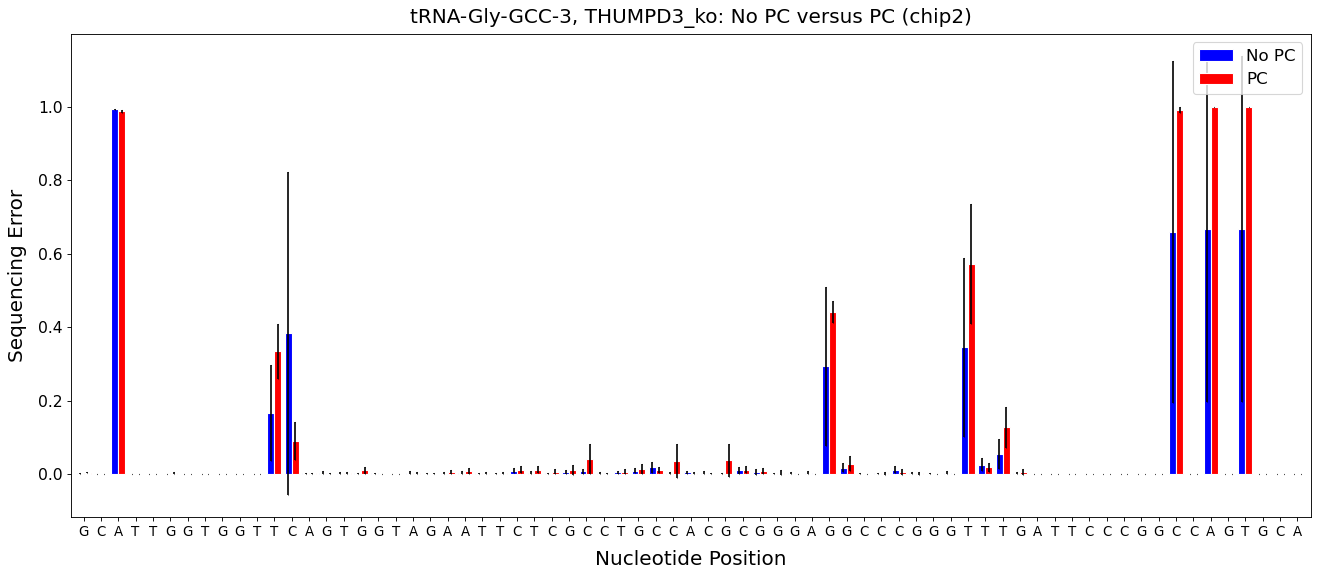

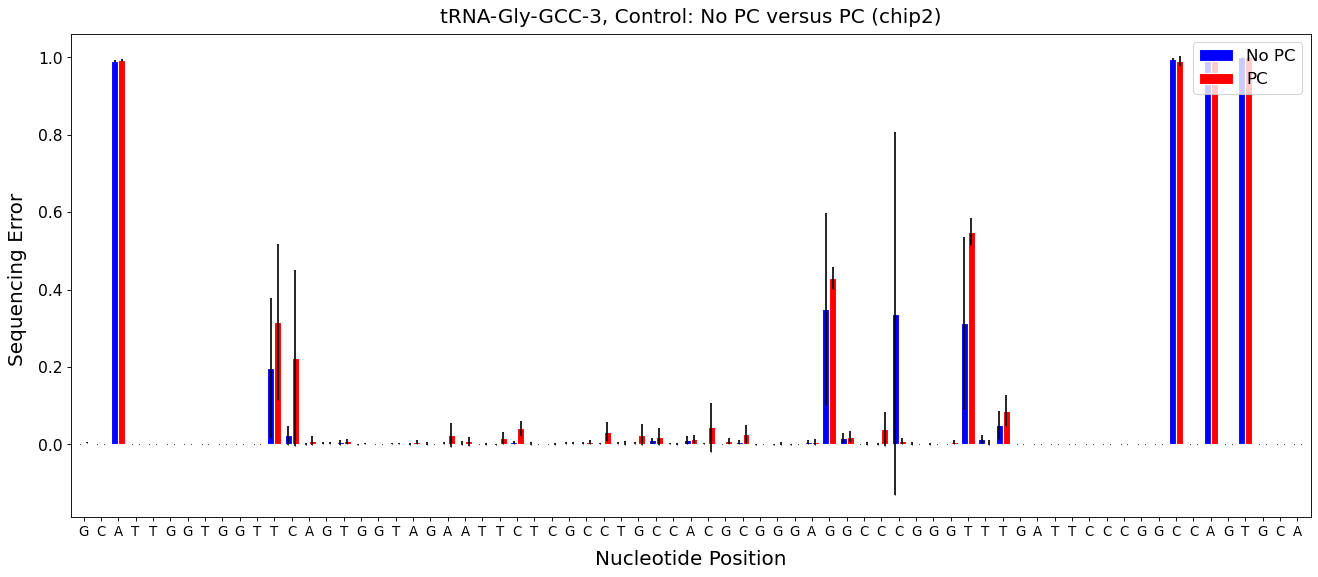

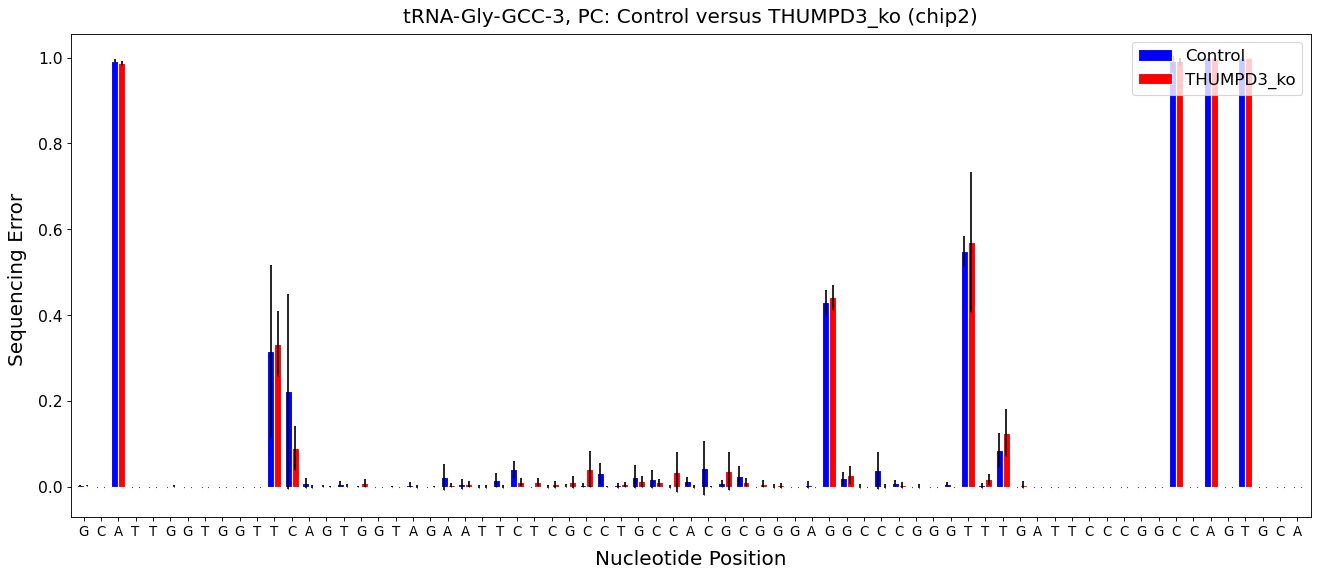

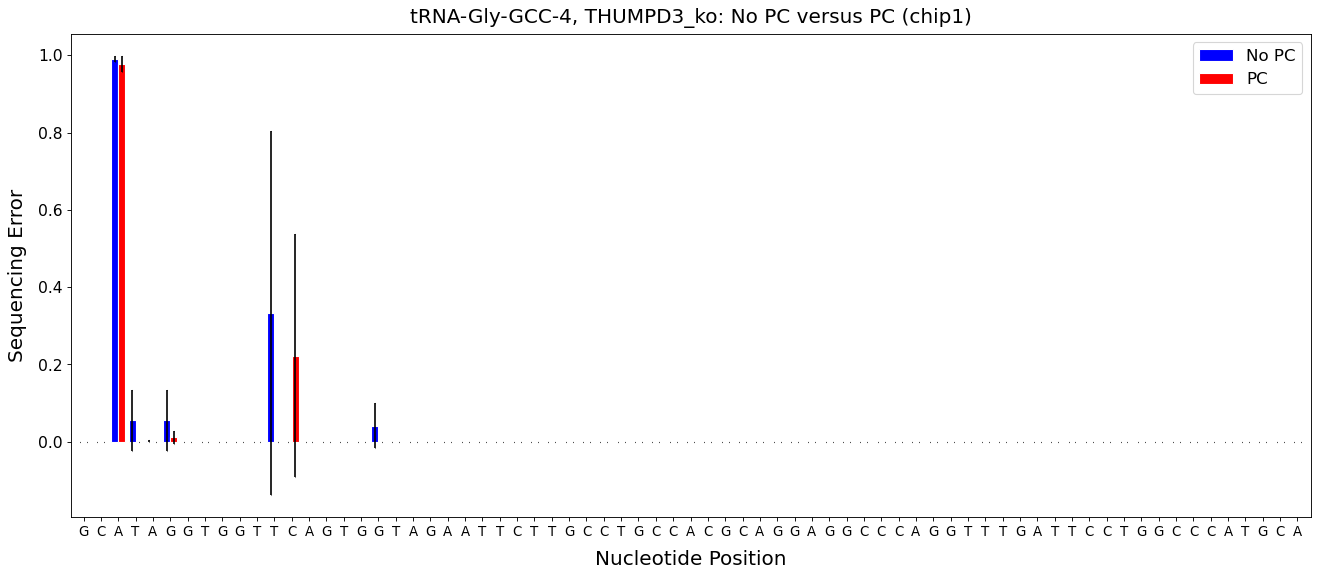

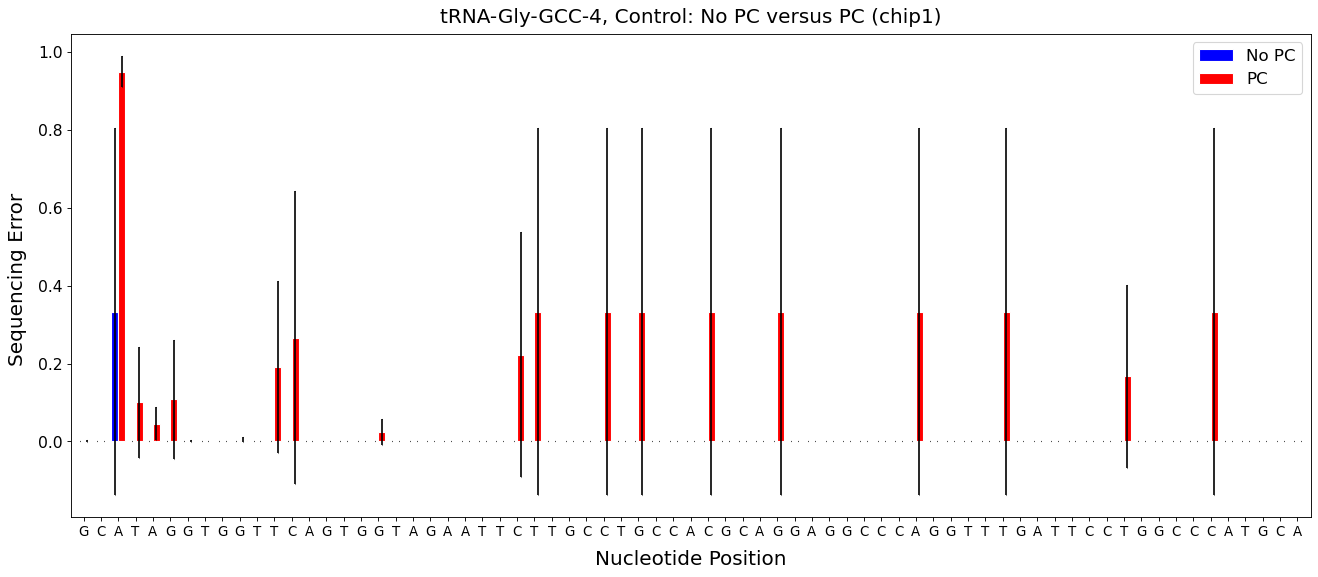

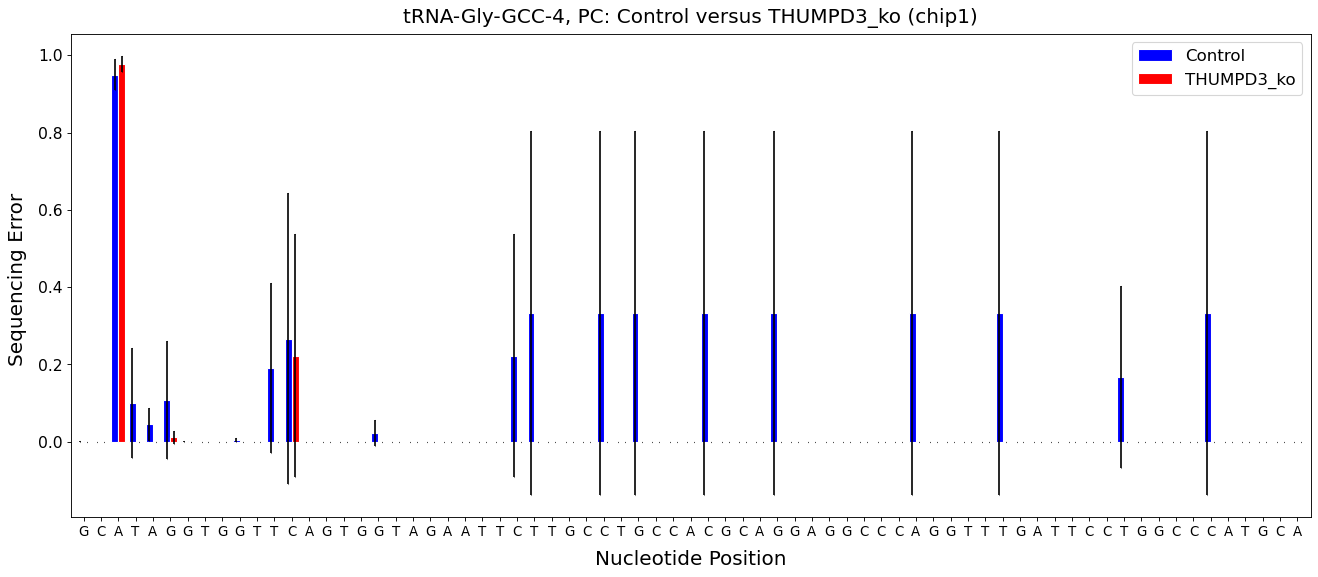

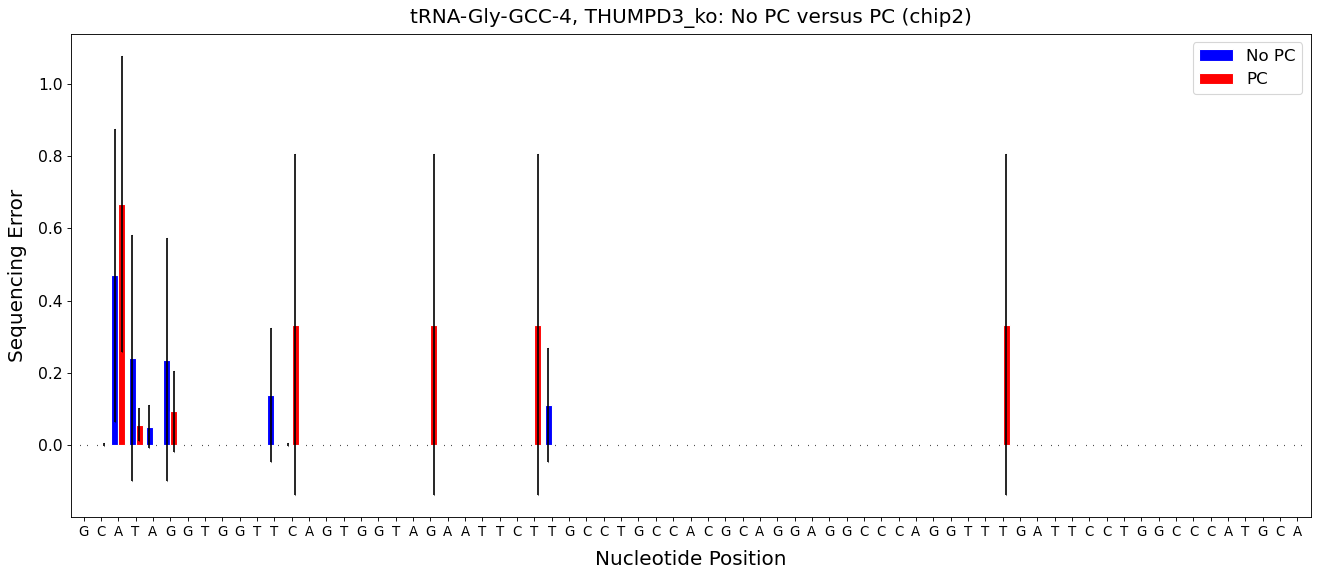

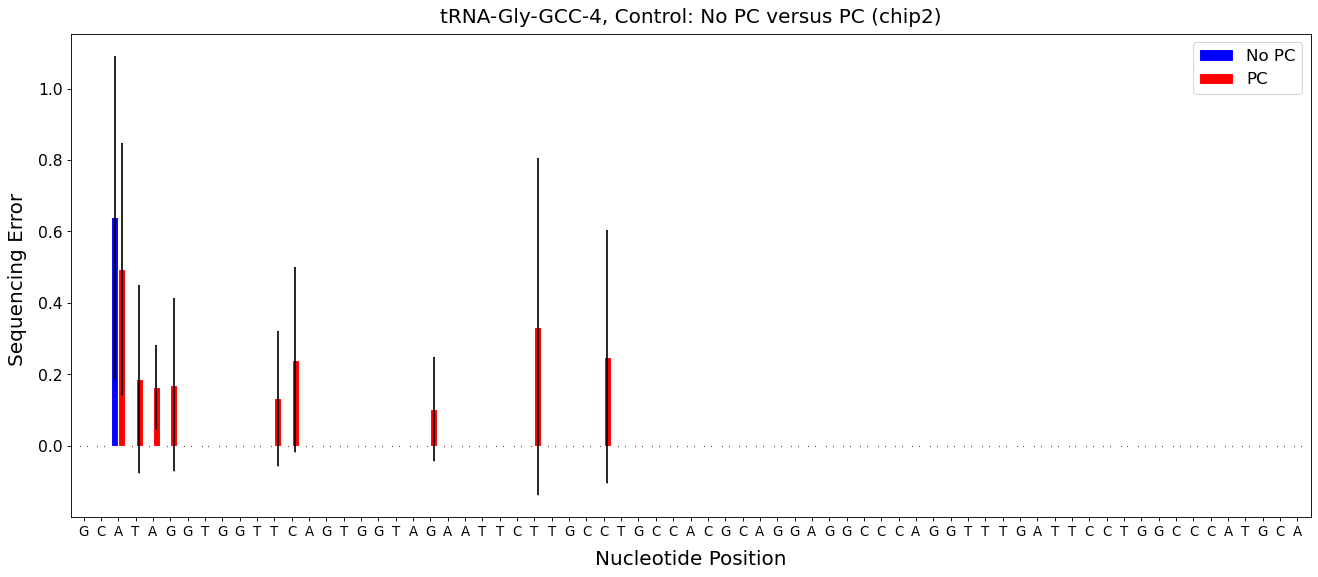

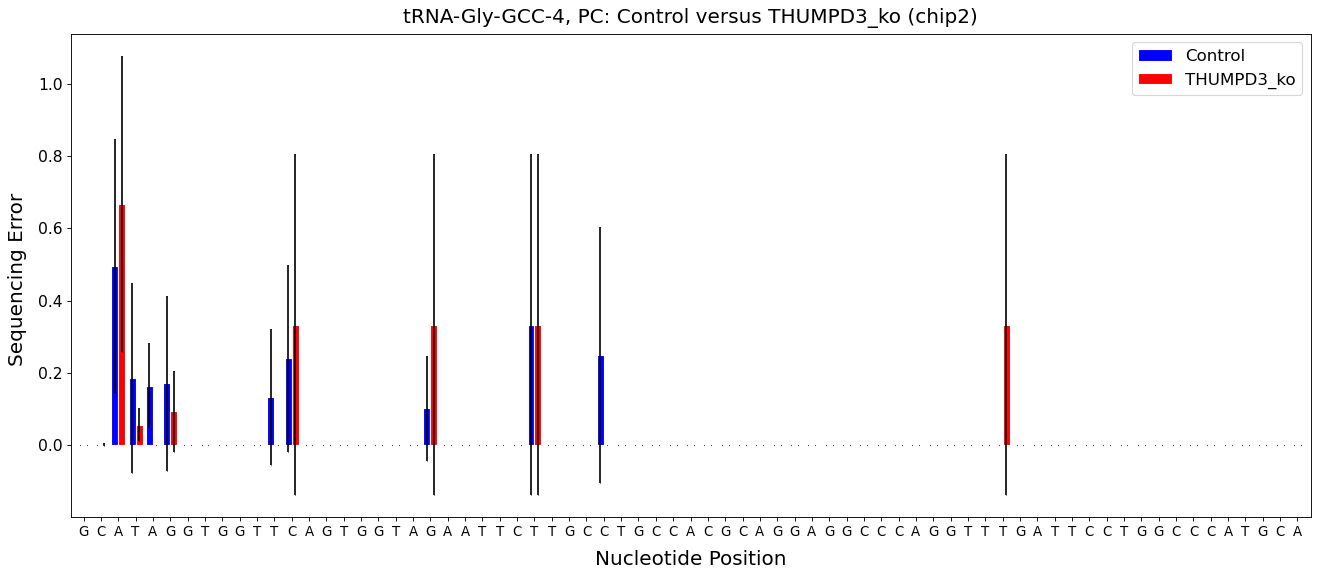

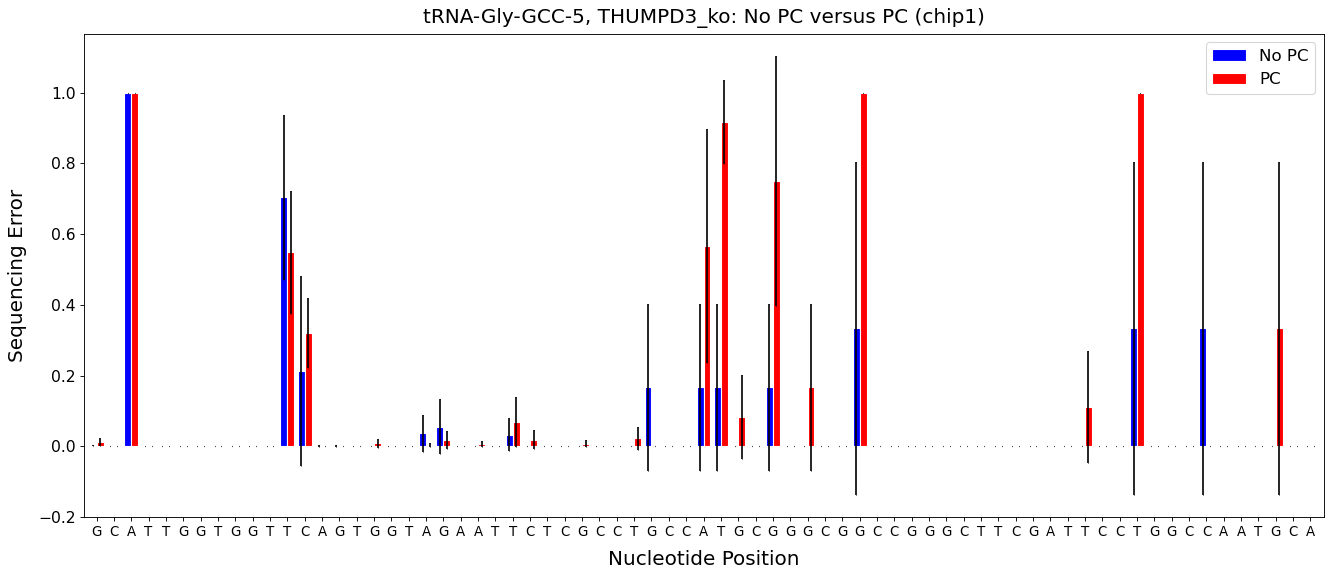

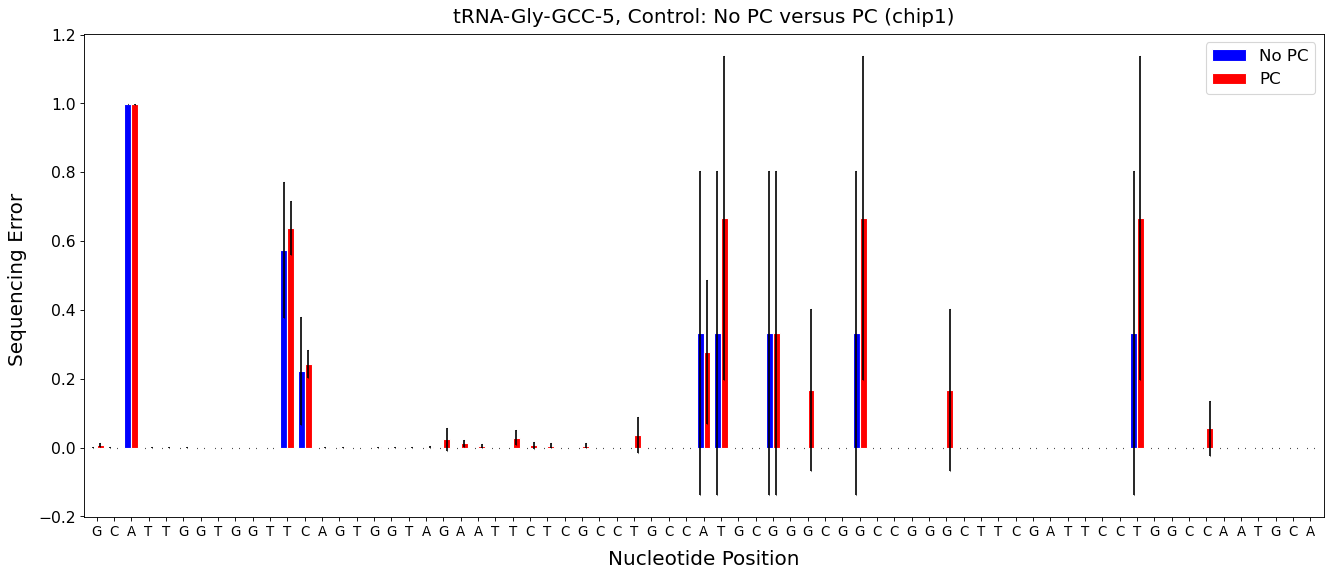

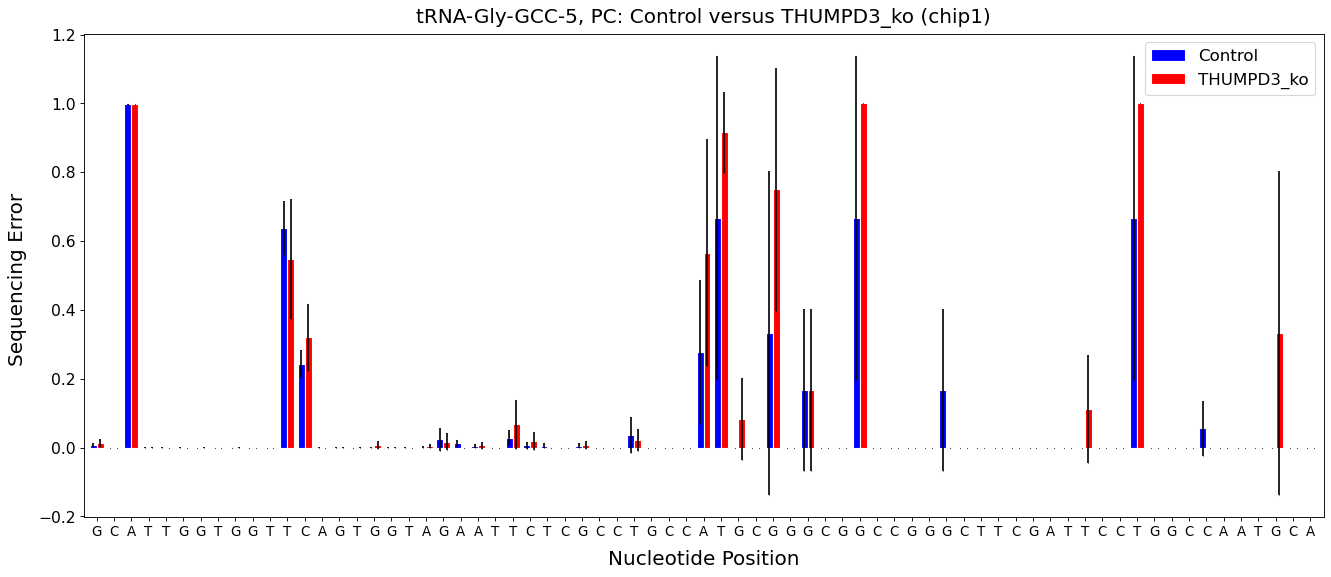

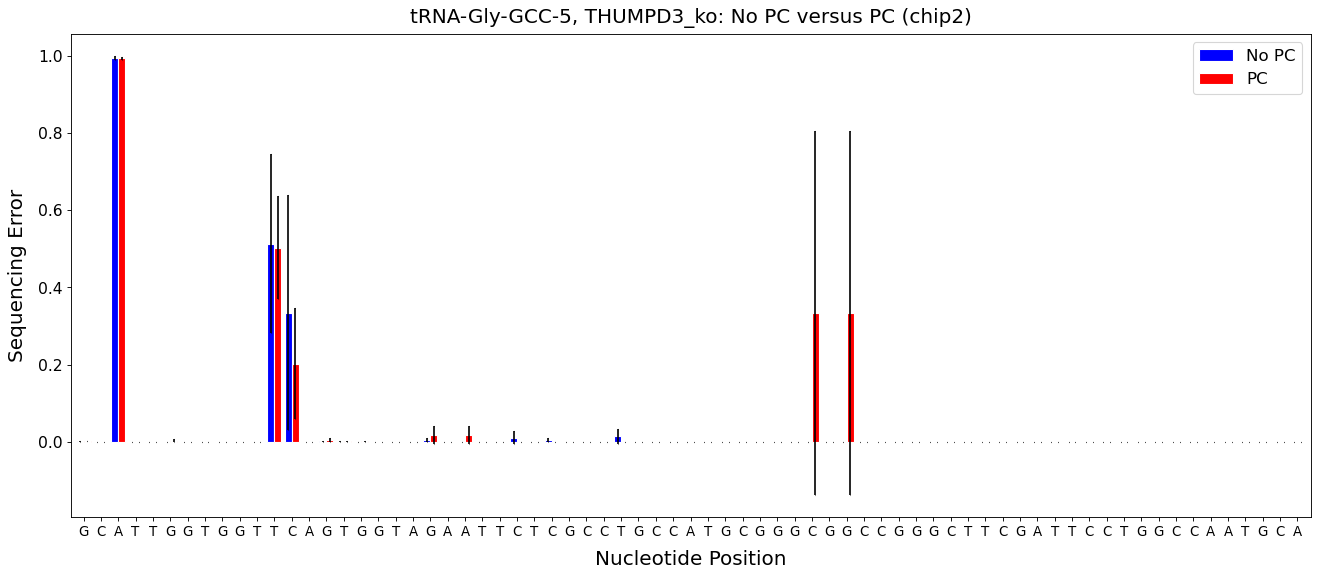

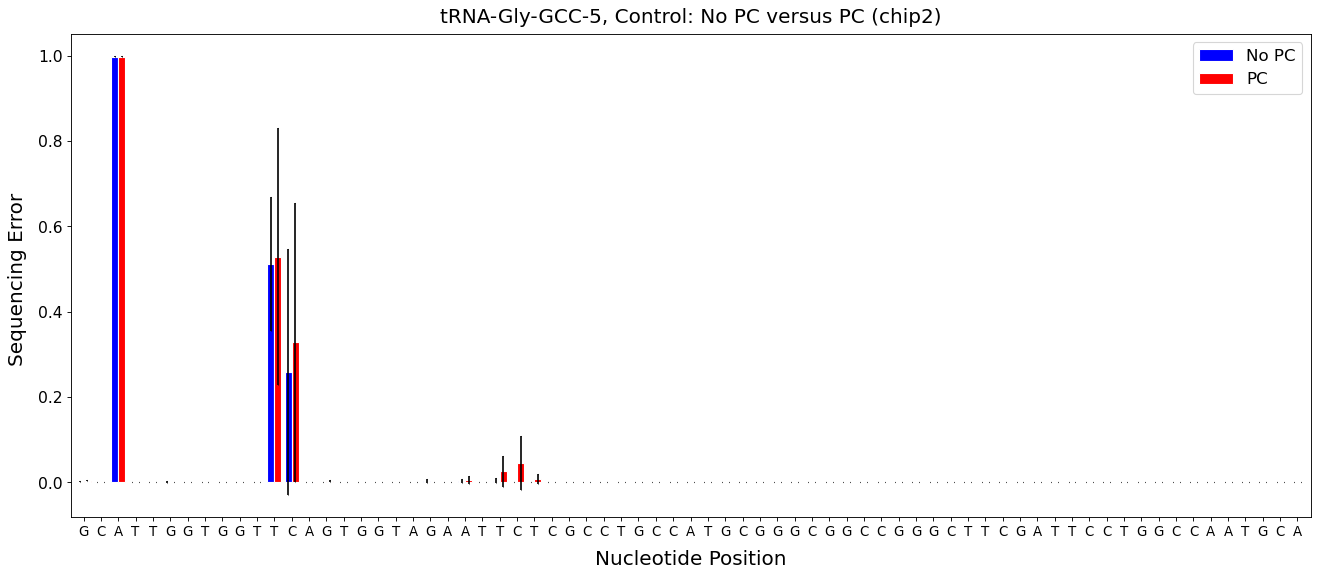

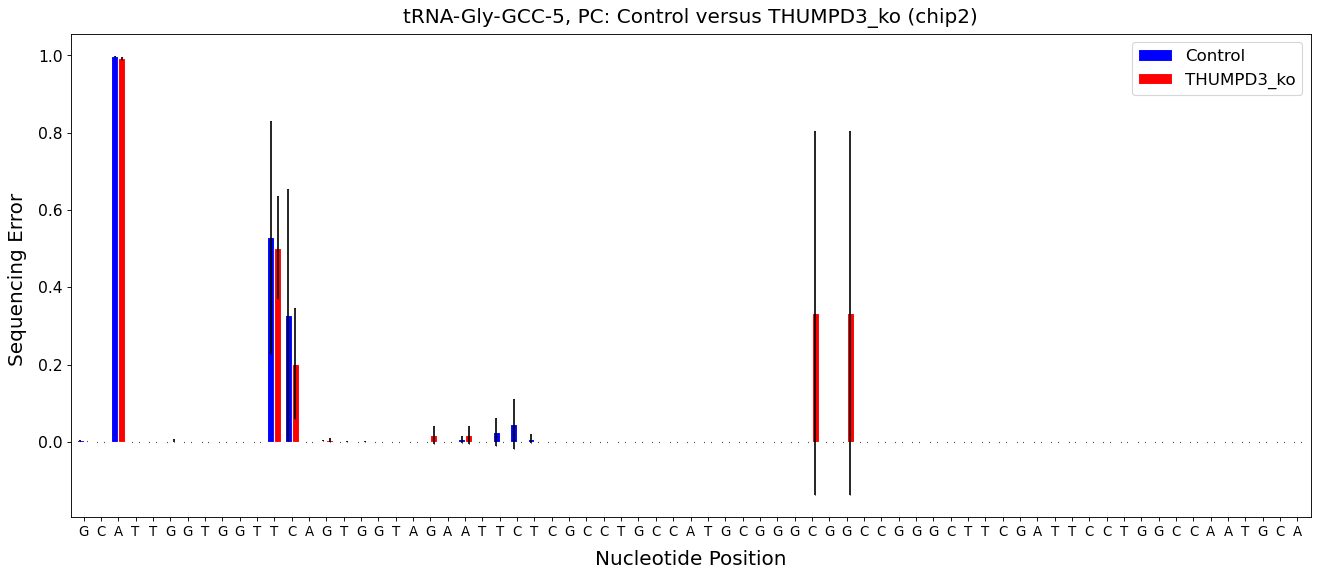

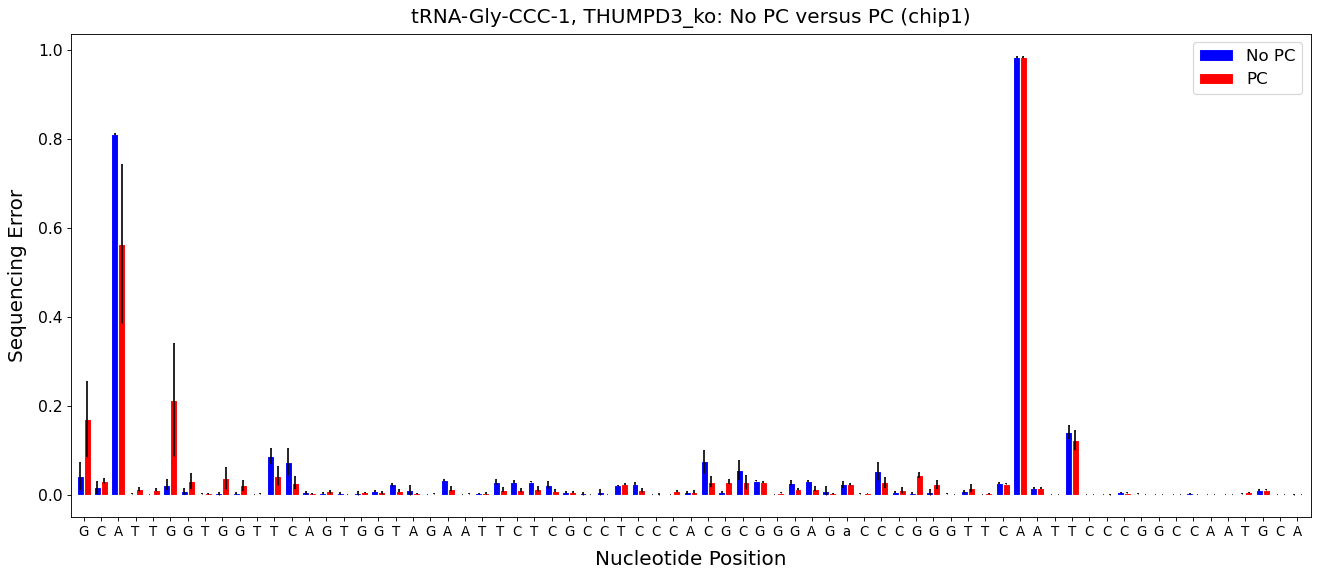

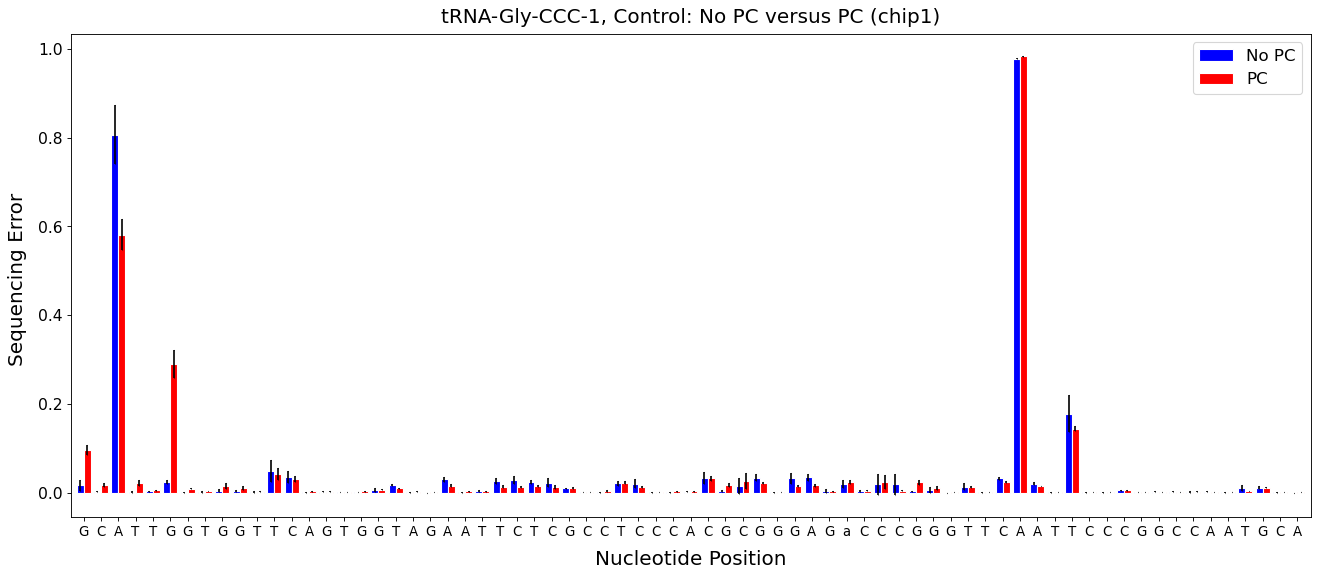

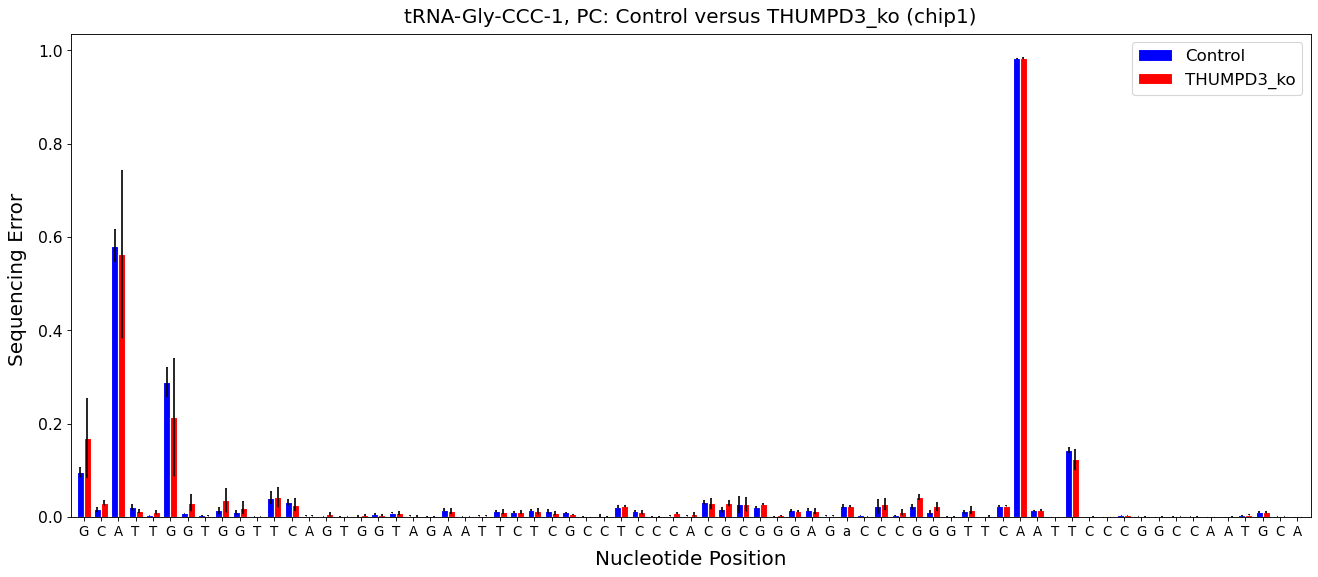

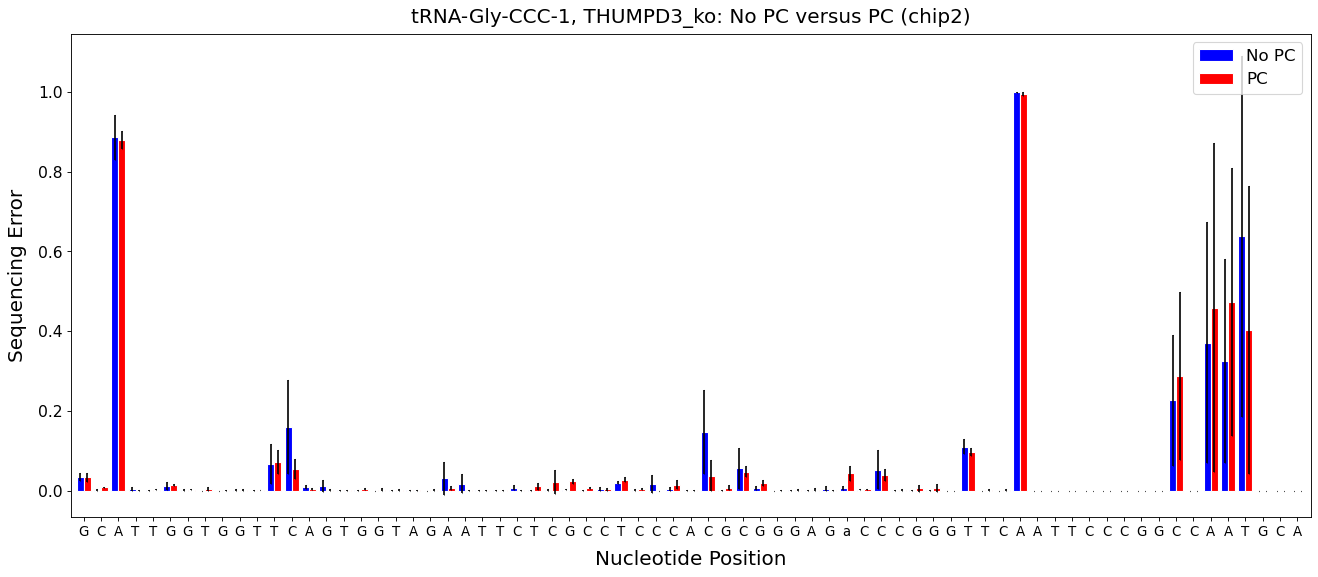

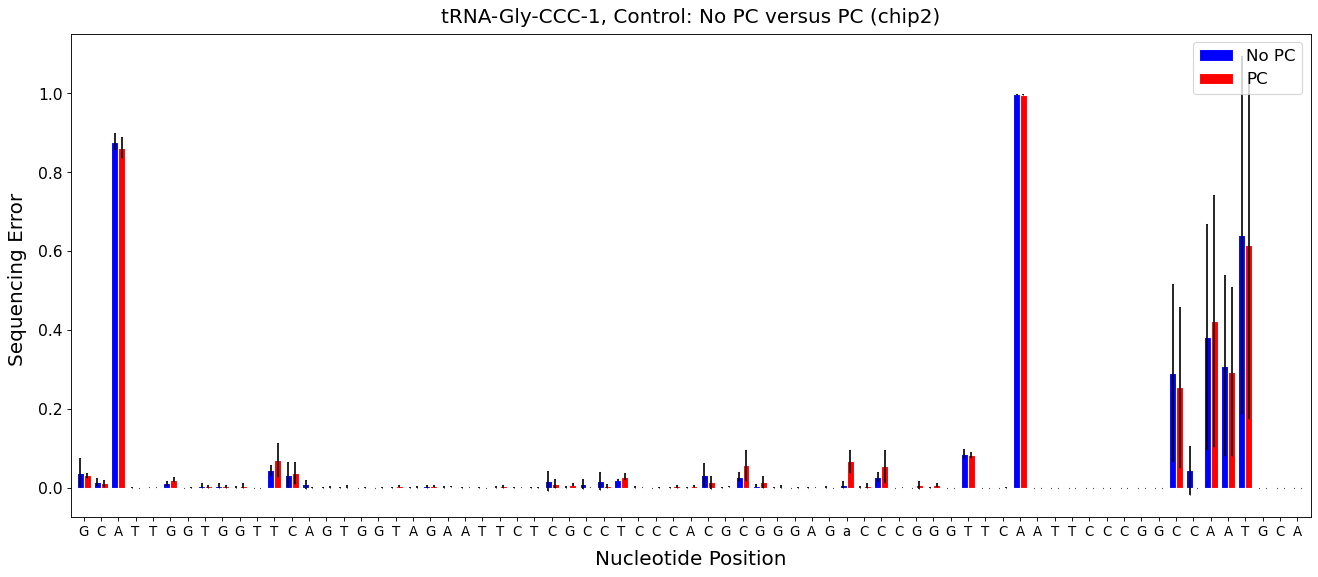

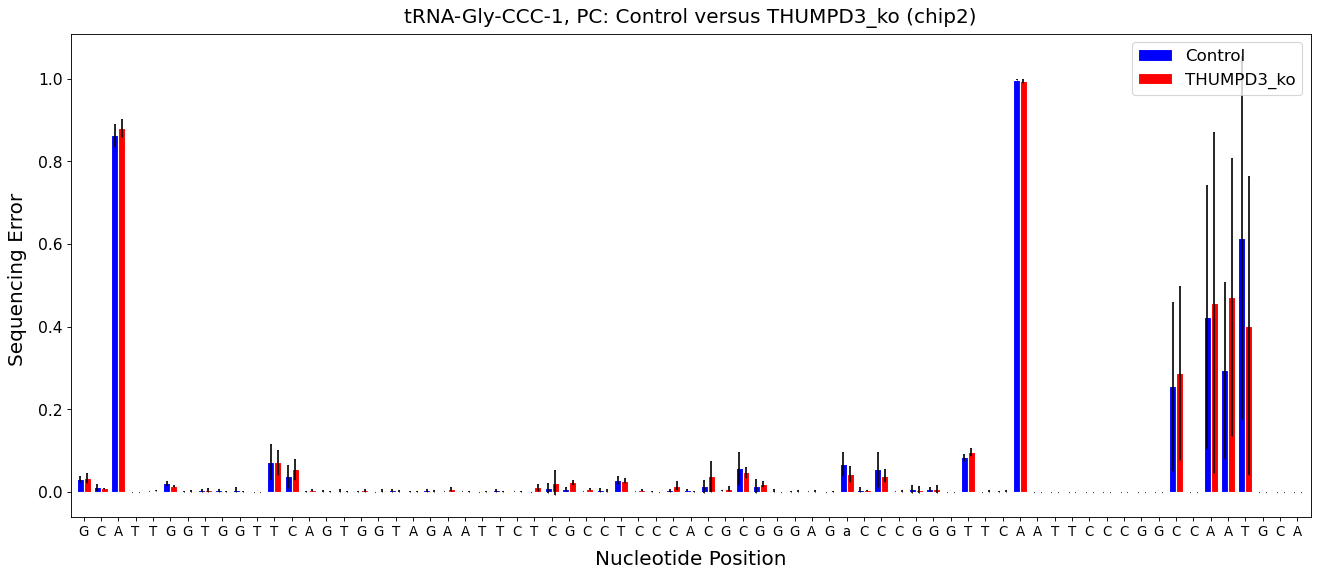

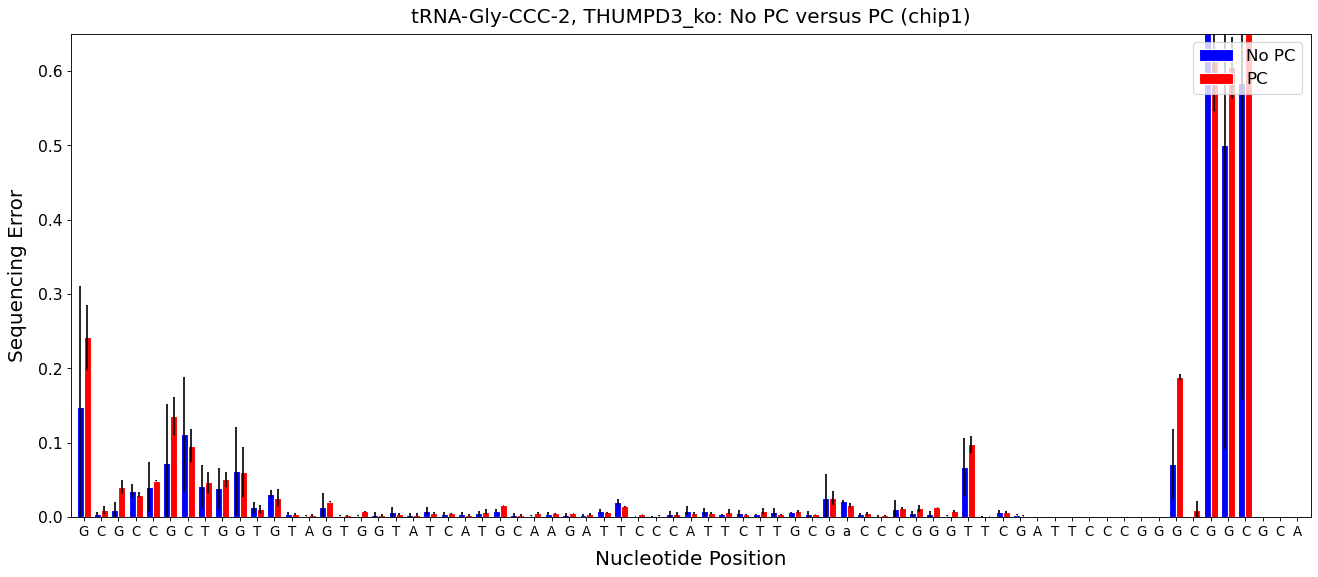

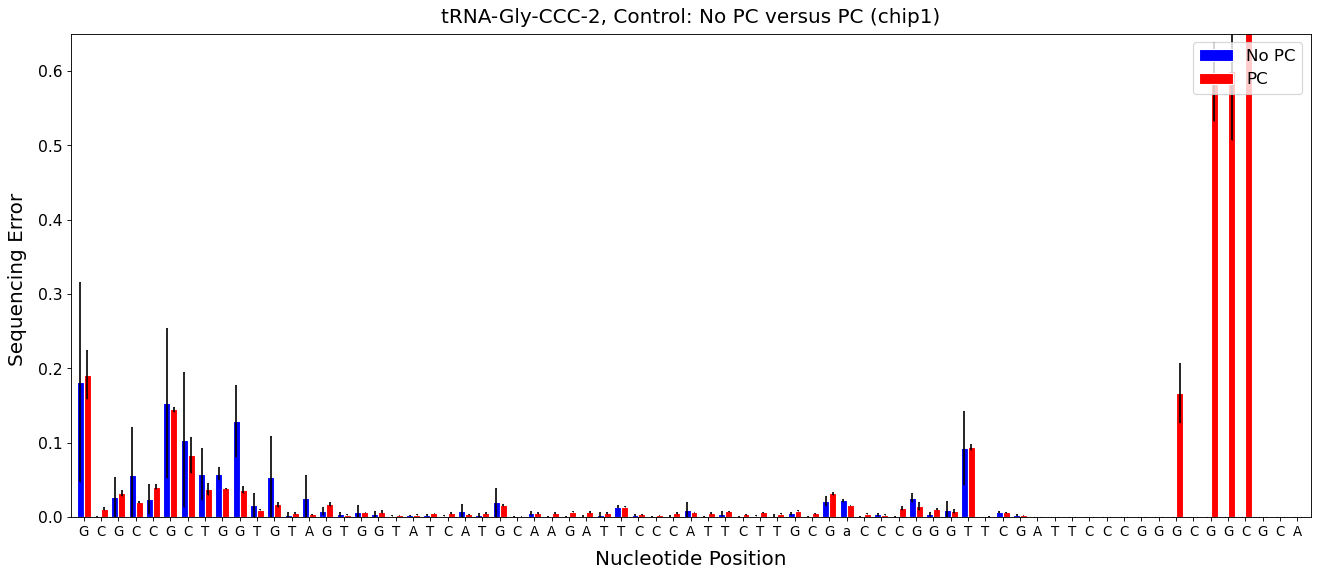

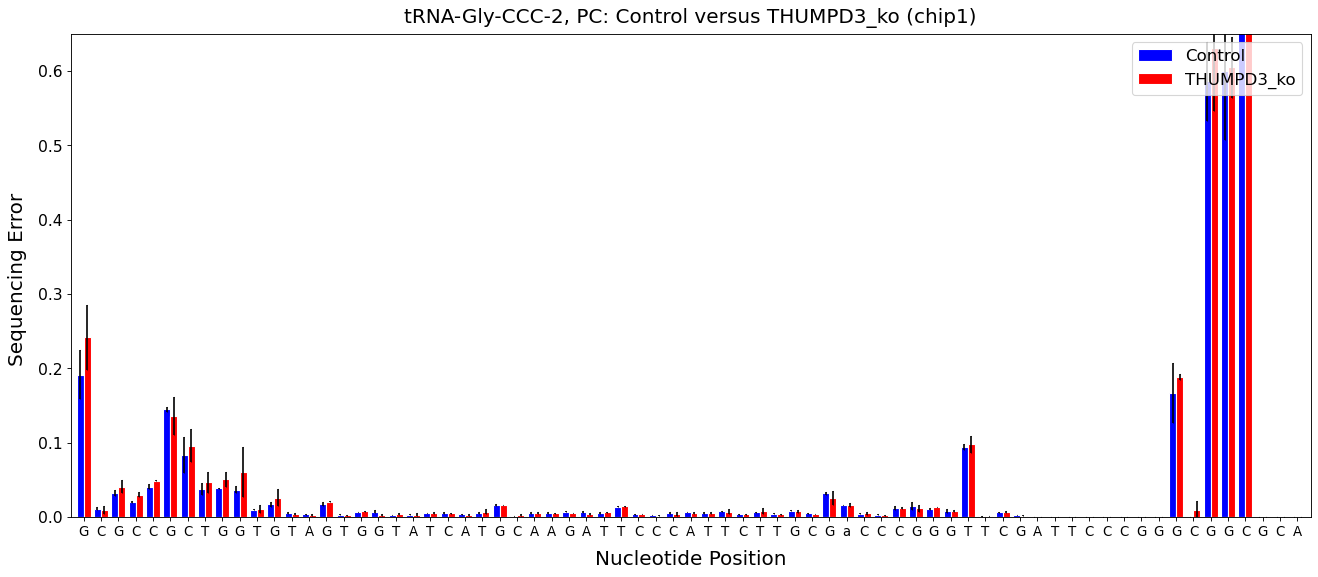

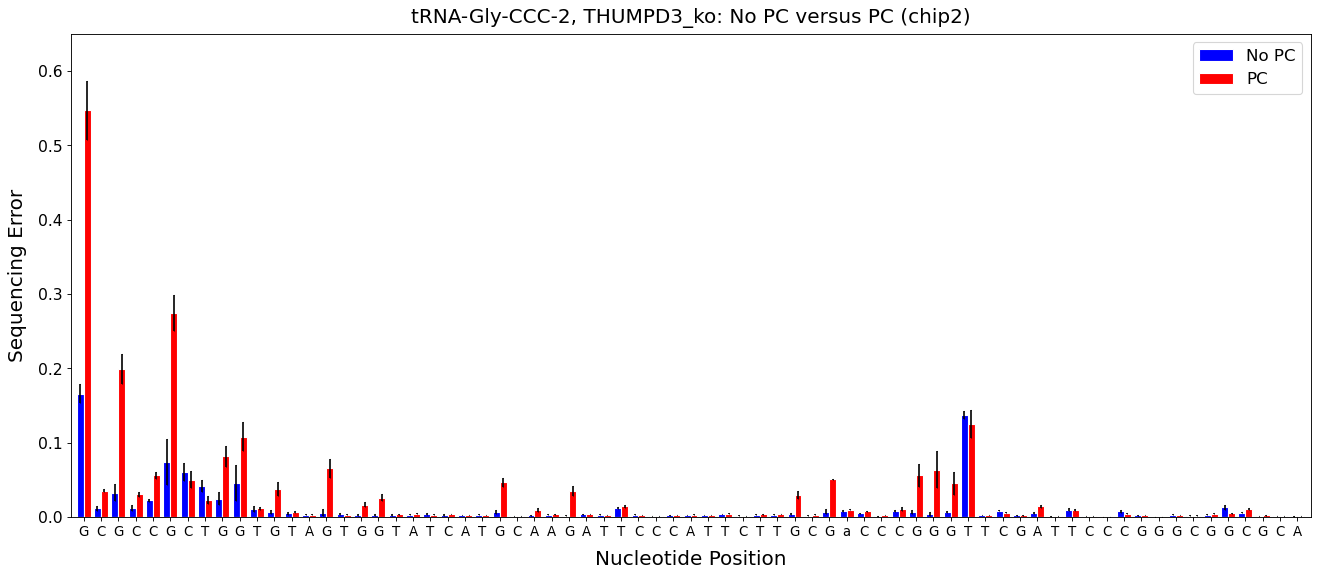

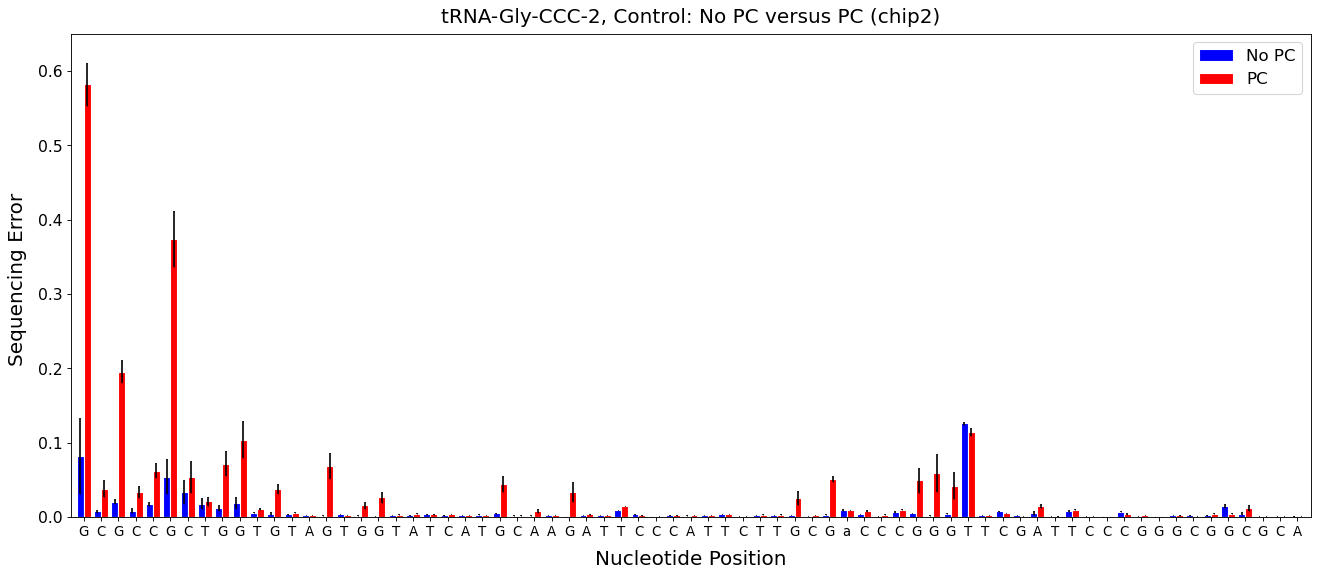

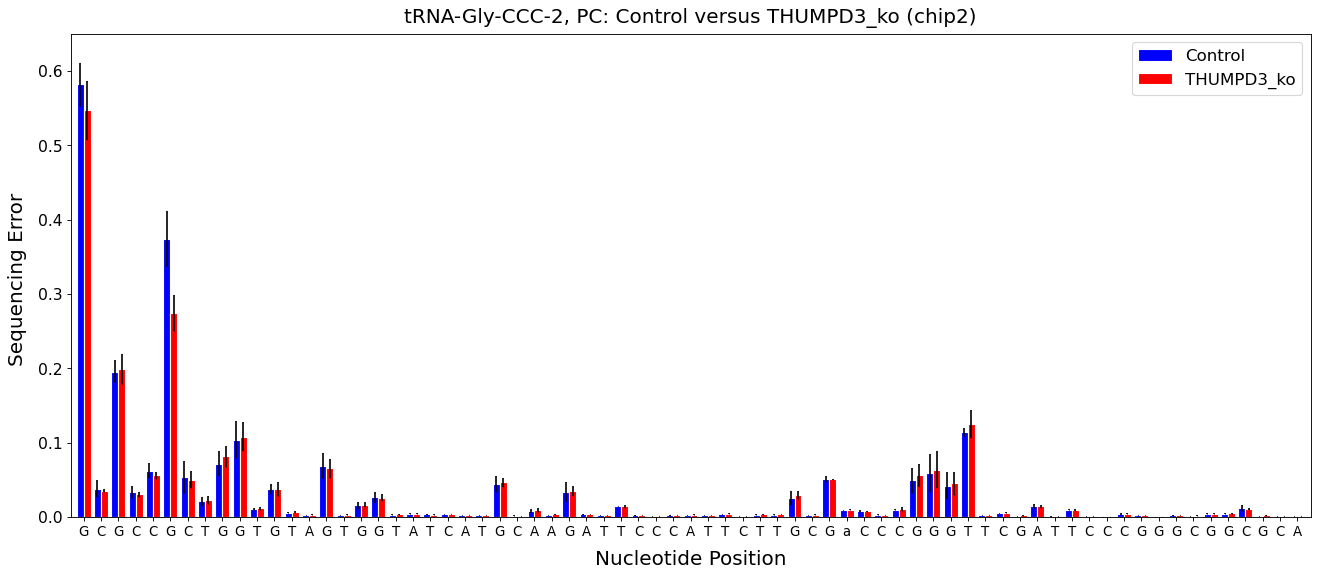

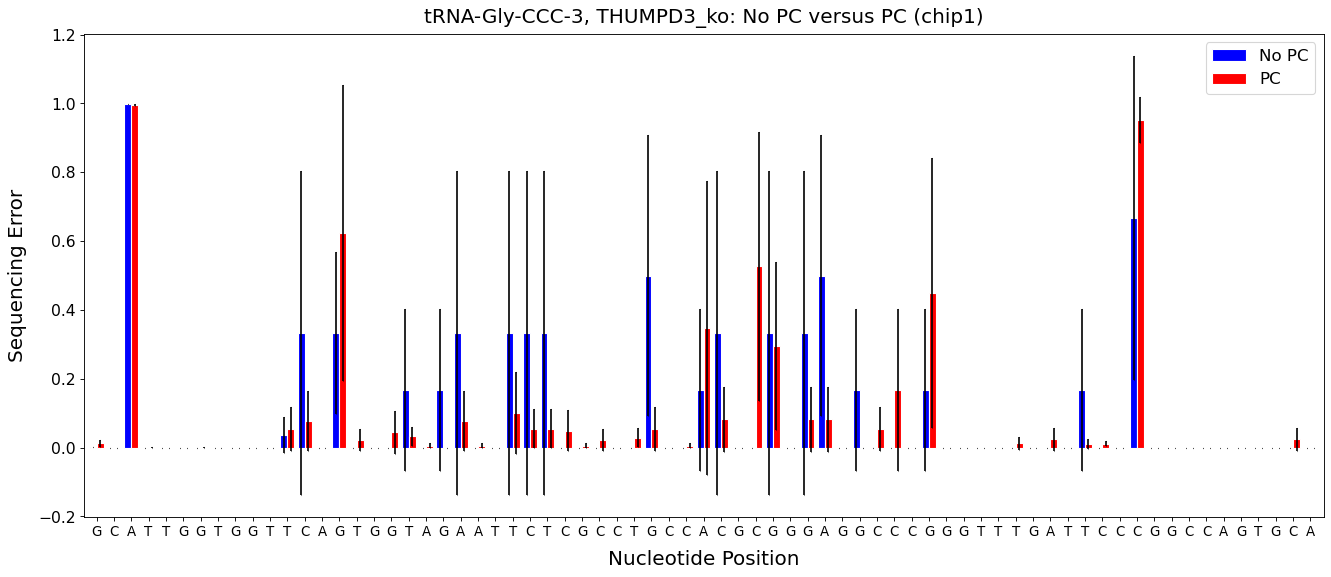

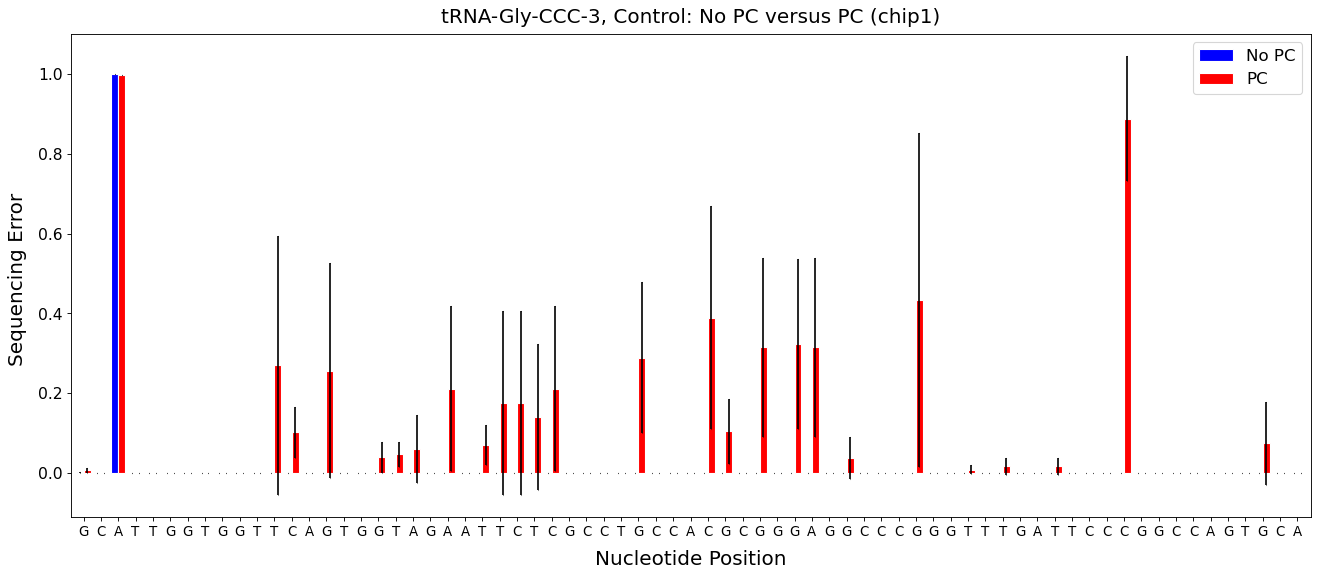

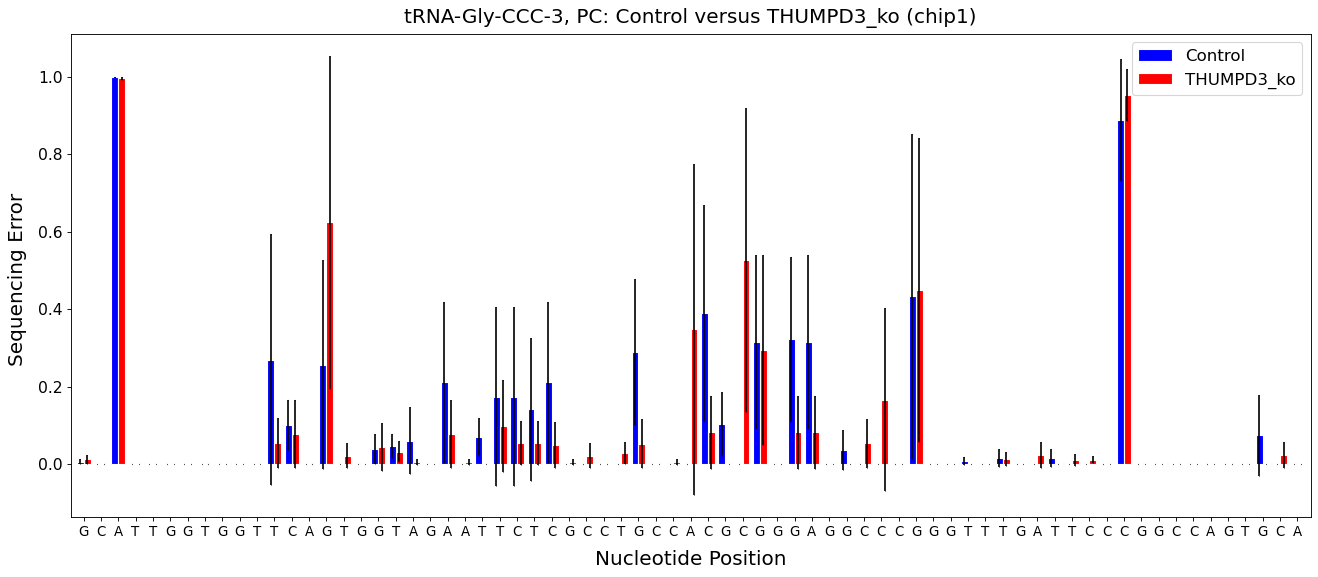

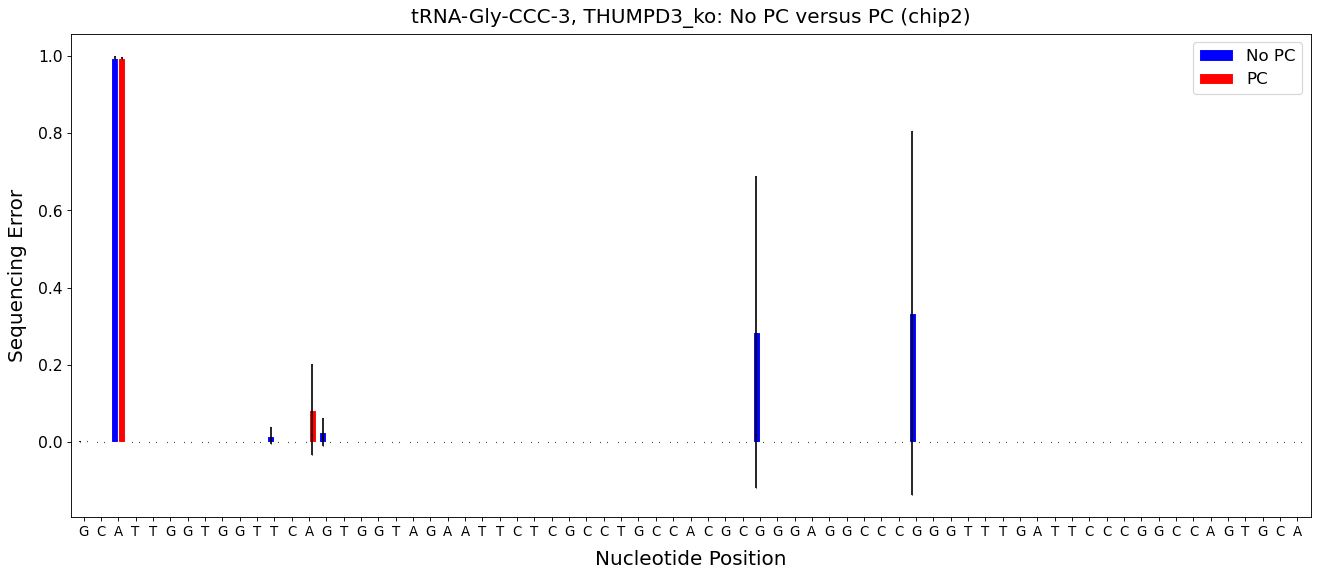

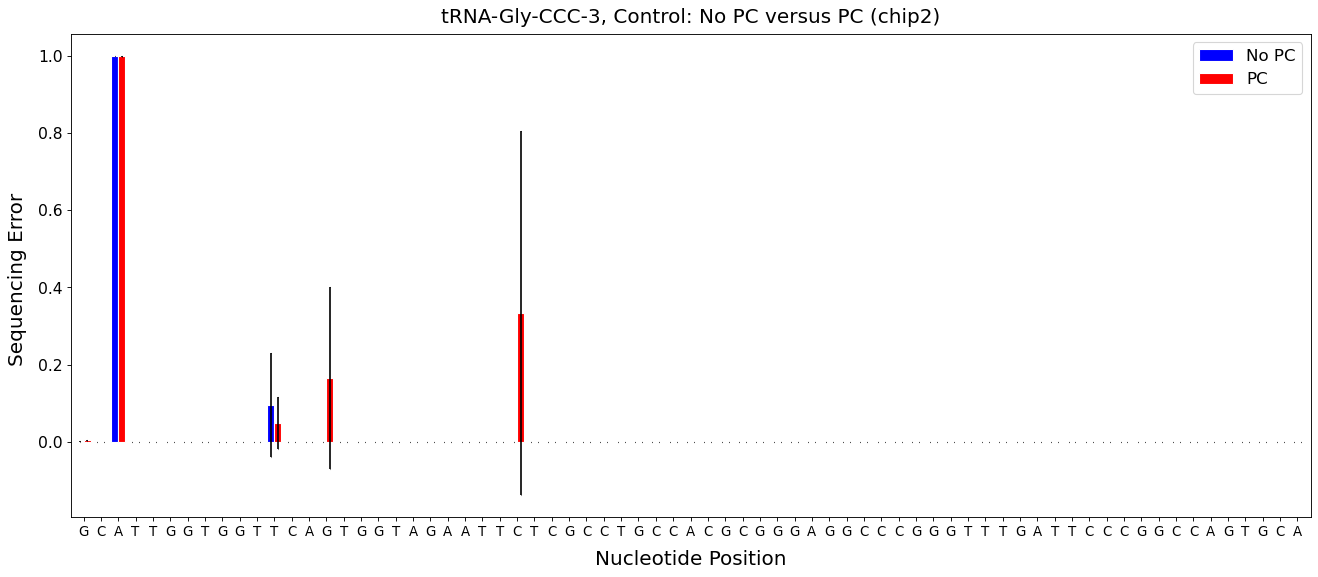

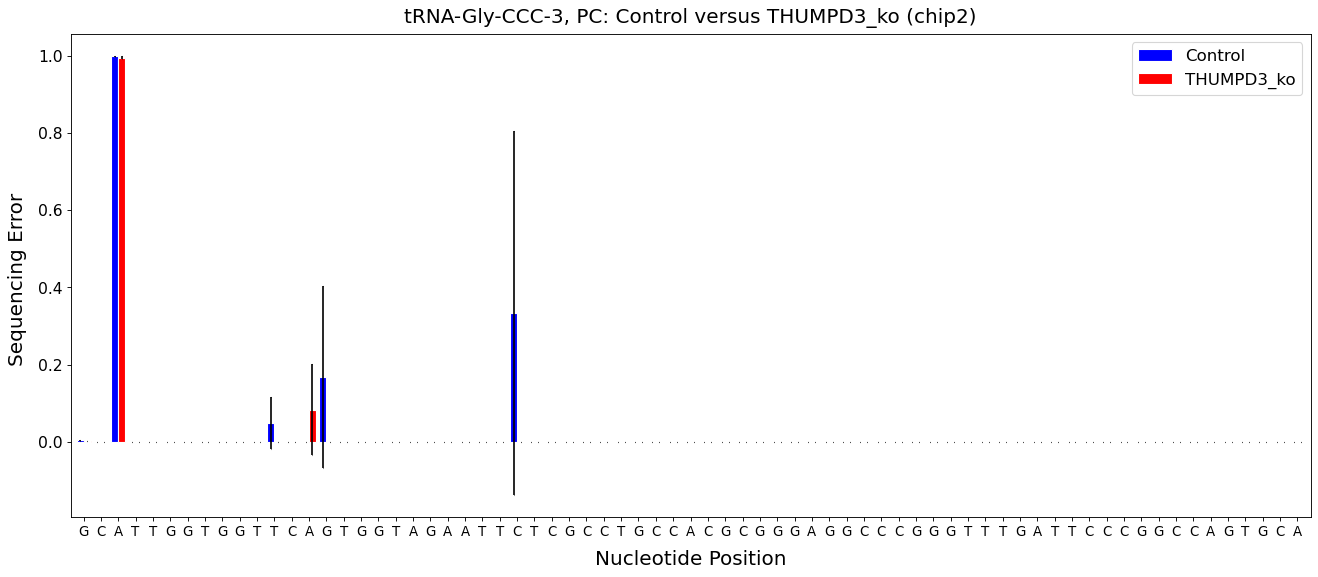

In [297]:
# create a loop to summarise and plot for all tRNA isodecoders

# lists
batch_list = ['chip1','chip2']
sample_list = ['01','02','03','04','05','06','07','08','09','10','11','12']
tRNA_list = ['tRNA-Gly-GCC-1', 'tRNA-Gly-GCC-2', 'tRNA-Gly-GCC-3','tRNA-Gly-GCC-4','tRNA-Gly-GCC-5','tRNA-Gly-CCC-1','tRNA-Gly-CCC-2','tRNA-Gly-CCC-3']

# create dictionary 
df = {}
df_tRNA = {}
df_tRNA_sum = {}
df_tRNA_depth = {}
df_tRNA_plot = {}

# Loop
for tRNA_type in tRNA_list:
    
#     for each tRNA isodecoder type, create a new dictionary within the big dictionary
    df_tRNA[tRNA_type] = {}
    df_tRNA_sum[tRNA_type] = {}
    df_tRNA_depth[tRNA_type] = {}
    
    for batch_number in batch_list:
        for sample_number in sample_list:
            
            # import bam-readcount output
            df['{}.01{}'.format(batch_number,sample_number)] = pd.read_csv('{}.01{}.bam_readcount.filtered.tsv'.format(batch_number,sample_number), sep='\t')
             
            # calculate vaf of each mismatch type again to have more decimal numbers
            df['{}.01{}'.format(batch_number,sample_number)]['vaf'] = df['{}.01{}'.format(batch_number,sample_number)]['count']/df['{}.01{}'.format(batch_number,sample_number)]['depth']

            # save the information for each tRNA isodecoder
            df_tRNA[tRNA_type]['{}.01{}'.format(batch_number,sample_number)] = df['{}.01{}'.format(batch_number,sample_number)][df['{}.01{}'.format(batch_number,sample_number)]['chrom'] == tRNA_type]
            
            # create list within each tRNA isodecoder type dictionary for error rate and sequencing depth
            df_tRNA_sum[tRNA_type]['{}.01{}'.format(batch_number,sample_number)] = []
            df_tRNA_depth[tRNA_type]['{}.01{}'.format(batch_number,sample_number)] = []
        
            # loop over each nucleotide position, append error rate and sequencing depth information
            for i in range(71):
            
                if (i+40) in df_tRNA[tRNA_type]['{}.01{}'.format(batch_number,sample_number)]['position'].values:
                
                    df_tRNA_depth[tRNA_type]['{}.01{}'.format(batch_number,sample_number)].append(df_tRNA[tRNA_type]['{}.01{}'.format(batch_number,sample_number)][df_tRNA[tRNA_type]['{}.01{}'.format(batch_number,sample_number)]['position'] == i + 40]['depth'].tolist()[0])
                    
                    if ((i+40) == 84) and (tRNA_type in ['tRNA-Gly-CCC-1', 'tRNA-Gly-CCC-2', 'tRNA-Gly-CCC-3']):
                    
                        df_tRNA_sum[tRNA_type]['{}.01{}'.format(batch_number,sample_number)].append(
                        df_tRNA[tRNA_type]['{}.01{}'.format(batch_number,sample_number)][df_tRNA[tRNA_type]['{}.01{}'.format(batch_number,sample_number)]['position'] == i+40 ]['vaf'].sum() - 
                        df_tRNA[tRNA_type]['{}.01{}'.format(batch_number,sample_number)][(df_tRNA[tRNA_type]['{}.01{}'.format(batch_number,sample_number)]['position'] == i+40) & (df_tRNA[tRNA_type]['{}.01{}'.format(batch_number,sample_number)]['base'] == 'A') ]['vaf'].sum())
                
                    else:
                    
                        df_tRNA_sum[tRNA_type]['{}.01{}'.format(batch_number,sample_number)].append(df_tRNA[tRNA_type]['{}.01{}'.format(batch_number,sample_number)][df_tRNA[tRNA_type]['{}.01{}'.format(batch_number,sample_number)]['position'] == i+40 ]['vaf'].sum())
            
                else:
                
                    df_tRNA_sum[tRNA_type]['{}.01{}'.format(batch_number,sample_number)].append(0)
                    df_tRNA_depth[tRNA_type]['{}.01{}'.format(batch_number,sample_number)].append(0)
    
    # convert each list to dataframe and save into csv file
    df_tRNA_sum_save = pd.DataFrame(df_tRNA_sum[tRNA_type])
    df_tRNA_depth_save = pd.DataFrame(df_tRNA_depth[tRNA_type])
    df_tRNA_sum_save.to_csv('{}_sum.csv'.format(tRNA_type))
    df_tRNA_depth_save.to_csv('{}_depth.csv'.format(tRNA_type))

# make plots
for tRNA_type in tRNA_list:
    for batch_number in batch_list:
        
        # group vaf information of each isodecoder type by experimental groups: Control: No PC vs PC; THUMPD3_ko: No PC vs PC
        df_tRNA_plot[tRNA_type] = {}
        df_tRNA_plot[tRNA_type]['Control'] = pd.DataFrame()
        df_tRNA_plot[tRNA_type]['Control']['{}.0101'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0101'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['Control']['{}.0103'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0103'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['Control']['{}.0105'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0105'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['Control']['mean'] = df_tRNA_plot[tRNA_type]['Control'].mean(axis=1)
        df_tRNA_plot[tRNA_type]['Control']['STD'] = df_tRNA_plot[tRNA_type]['Control'].std(axis=1)

        df_tRNA_plot[tRNA_type]['PC'] = pd.DataFrame()
        df_tRNA_plot[tRNA_type]['PC']['{}.0102'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0102'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['PC']['{}.0104'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0104'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['PC']['{}.0106'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0106'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['PC']['mean'] = df_tRNA_plot[tRNA_type]['PC'].mean(axis=1)
        df_tRNA_plot[tRNA_type]['PC']['STD'] = df_tRNA_plot[tRNA_type]['PC'].std(axis=1)

        df_tRNA_plot[tRNA_type]['Control_THUMPD3_ko'] = pd.DataFrame()
        df_tRNA_plot[tRNA_type]['Control_THUMPD3_ko']['{}.0107'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0107'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['Control_THUMPD3_ko']['{}.0109'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0109'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['Control_THUMPD3_ko']['{}.0111'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0111'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['Control_THUMPD3_ko']['mean'] = df_tRNA_plot[tRNA_type]['Control_THUMPD3_ko'].mean(axis=1)
        df_tRNA_plot[tRNA_type]['Control_THUMPD3_ko']['STD'] = df_tRNA_plot[tRNA_type]['Control_THUMPD3_ko'].std(axis=1)

        df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko'] = pd.DataFrame()
        df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko']['{}.0108'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0108'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko']['{}.0110'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0110'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko']['{}.0112'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0112'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko']['mean'] = df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko'].mean(axis=1)
        df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko']['STD'] = df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko'].std(axis=1)
    
# Plot 1
        # plot THUMPD3_ko
        barWidth = 0.4
        plt.figure(figsize=(20, 8), dpi=80)
        plt.rc('legend', fontsize=15)    # legend fontsize
        plt.rc('ytick', labelsize=14)    # legend fontsize
        plt.rc('xtick', labelsize=12) 
        plt.rcParams['axes.xmargin'] = 0.005
        plt.rcParams['axes.titlepad'] = 10 

        # Set position of bar on X axis
        r1 = np.arange(71)
        r2 = [x + barWidth for x in r1]

        # Make the plot
        plt.bar(r1,  df_tRNA_plot[tRNA_type]['Control_THUMPD3_ko']['mean'], yerr= df_tRNA_plot[tRNA_type]['Control_THUMPD3_ko']['STD'], color='blue', width=barWidth, edgecolor='white', label='No PC', capsize=0.2)
        plt.bar(r2,  df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko']['mean'], yerr= df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko']['STD'], color='red', width=barWidth, edgecolor='white', label='PC',capsize=0.2)

        # Add xticks on the middle of the group bars
        plt.xlabel("Nucleotide Position",fontsize=18,labelpad=10)
        plt.ylabel("Sequencing Error",fontsize=18,labelpad=10)
        plt.title("{}, THUMPD3_ko: No PC versus PC ({})".format(tRNA_type,batch_number), fontsize=18)

        plt.xticks([r + 0.2 for r in range(71)], tRNA_sequence[tRNA_type])
        
        if tRNA_type == 'tRNA-Gly-CCC-2':
            plt.ylim(0,0.65)
            
        if tRNA_type == 'tRNA-Gly-GCC-2':
            plt.ylim(0,0.5)

        # Create legend & Show graphic
        plt.legend(loc='upper right')
        plt.savefig('{}_THUMPD3_ko_{}_SE.png'.format(tRNA_type,batch_number),dpi=500, bbox_inches='tight')
        plt.show()

# Plot 2
        # plot Control
        barWidth = 0.4
        plt.figure(figsize=(20, 8), dpi=80)
        plt.rc('legend', fontsize=15)    # legend fontsize
        plt.rc('ytick', labelsize=14)    # legend fontsize
        plt.rc('xtick', labelsize=12) 
        plt.rcParams['axes.xmargin'] = 0.005
        plt.rcParams['axes.titlepad'] = 10 

        # Set position of bar on X axis
        r1 = np.arange(71)
        r2 = [x + barWidth for x in r1]

        # Make the plot
        plt.bar(r1,  df_tRNA_plot[tRNA_type]['Control']['mean'], yerr= df_tRNA_plot[tRNA_type]['Control']['STD'], color='blue', width=barWidth, edgecolor='white', label='No PC', capsize=0.2)
        plt.bar(r2,  df_tRNA_plot[tRNA_type]['PC']['mean'], yerr= df_tRNA_plot[tRNA_type]['PC']['STD'], color='red', width=barWidth, edgecolor='white', label='PC',capsize=0.2)

        # Add xticks on the middle of the group bars
        plt.xlabel("Nucleotide Position",fontsize=18,labelpad=10)
        plt.ylabel("Sequencing Error ",fontsize=18,labelpad=10)
        plt.title("{}, Control: No PC versus PC ({})".format(tRNA_type,batch_number), fontsize=18)

        plt.xticks([r + 0.2 for r in range(71)], tRNA_sequence[tRNA_type])
        
        if tRNA_type == 'tRNA-Gly-CCC-2':
            plt.ylim(0,0.65)
            
        if tRNA_type == 'tRNA-Gly-GCC-2':
            plt.ylim(0,0.5)

        # Create legend & Show graphic
        plt.legend(loc='upper right')
        plt.savefig('{}_Control_{}_SE.png'.format(tRNA_type,batch_number),dpi=500, bbox_inches='tight')
        plt.show()
        
# PLOT 3
        # plot Control versus THUMPD3_ko
        barWidth = 0.4
        plt.figure(figsize=(20, 8), dpi=80)
        plt.rc('legend', fontsize=15)    # legend fontsize
        plt.rc('ytick', labelsize=14)    # legend fontsize
        plt.rc('xtick', labelsize=12) 
        plt.rcParams['axes.xmargin'] = 0.005
        plt.rcParams['axes.titlepad'] = 10 

        # Set position of bar on X axis
        r1 = np.arange(71)
        r2 = [x + barWidth for x in r1]

        # Make the plot
        plt.bar(r1,  df_tRNA_plot[tRNA_type]['PC']['mean'], yerr= df_tRNA_plot[tRNA_type]['PC']['STD'], color='blue', width=barWidth, edgecolor='white', label='Control', capsize=0.2)
        plt.bar(r2,  df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko']['mean'], yerr= df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko']['STD'], color='red', width=barWidth, edgecolor='white', label='THUMPD3_ko',capsize=0.2)

        # Add xticks on the middle of the group bars
        plt.xlabel("Nucleotide Position",fontsize=18,labelpad=10)
        plt.ylabel("Sequencing Error ",fontsize=18,labelpad=10)
        plt.title("{}, PC: Control versus THUMPD3_ko ({})".format(tRNA_type,batch_number), fontsize=18)

        plt.xticks([r + 0.2 for r in range(71)], tRNA_sequence[tRNA_type])
        
        if tRNA_type == 'tRNA-Gly-CCC-2':
            plt.ylim(0,0.65)
            
        if tRNA_type == 'tRNA-Gly-GCC-2':
            plt.ylim(0,0.5)

        # Create legend & Show graphic
        plt.legend(loc='upper right')
        plt.savefig('{}_Control_THUMPD3_ko_{}_SE.png'.format(tRNA_type,batch_number),dpi=500, bbox_inches='tight')
        plt.show()
        
        
                    
        

----------------------------------------------------------------------------------------
Loop over each batch and sample and tRNA isodecoder type, to:
- plot sequence coverage at each base position 

----------------------------------------------------------------------------------------

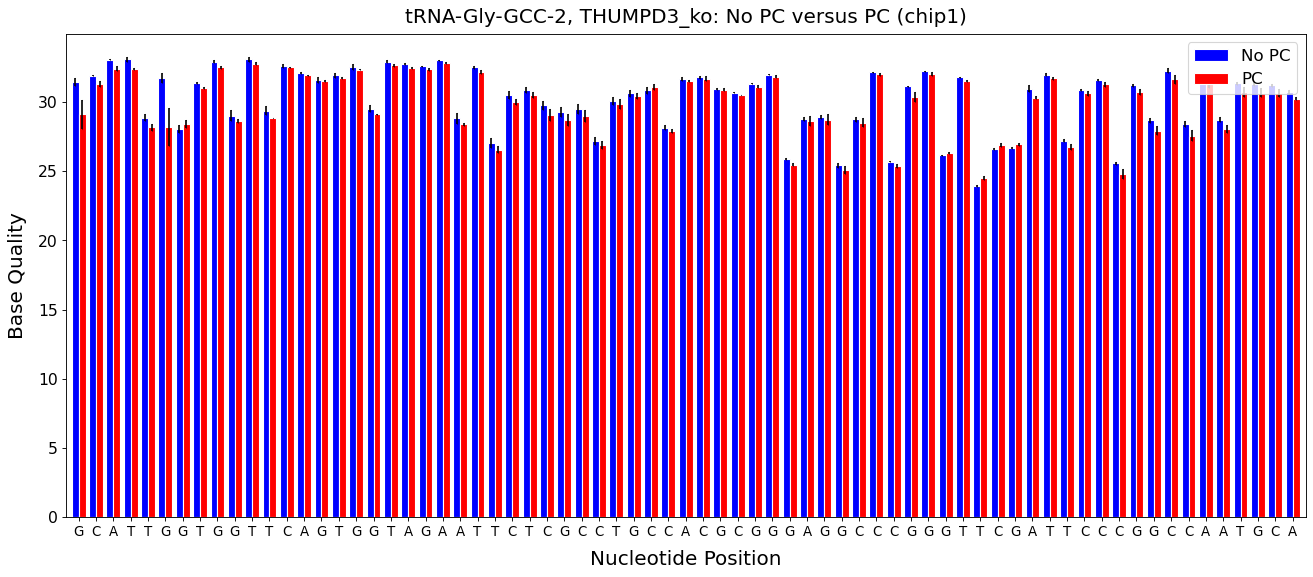

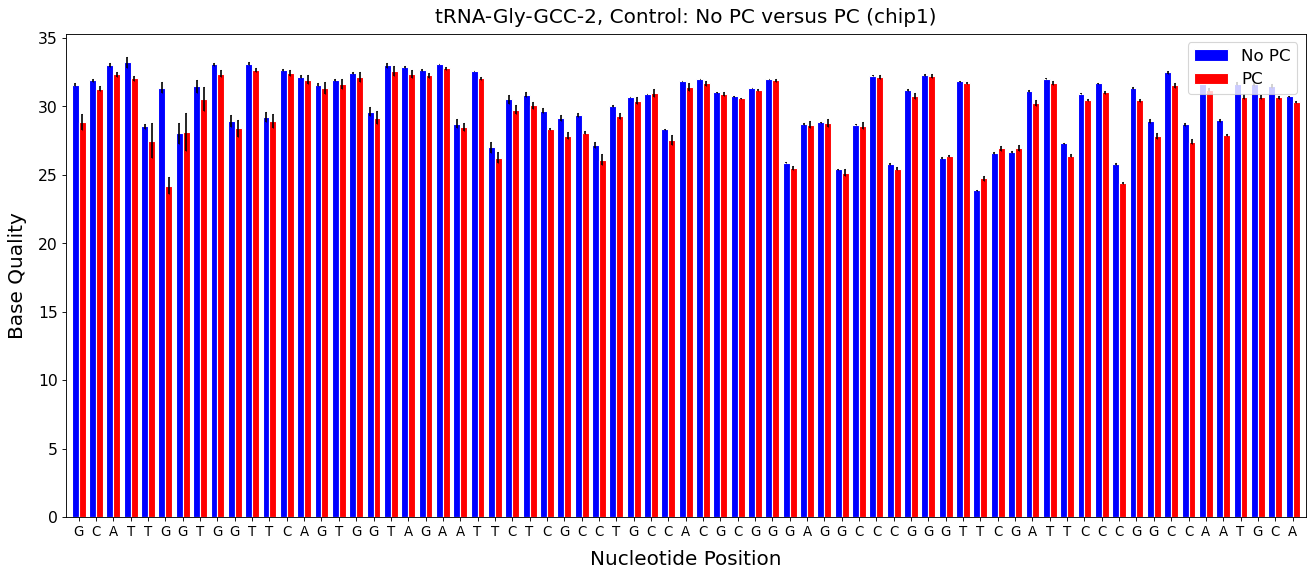

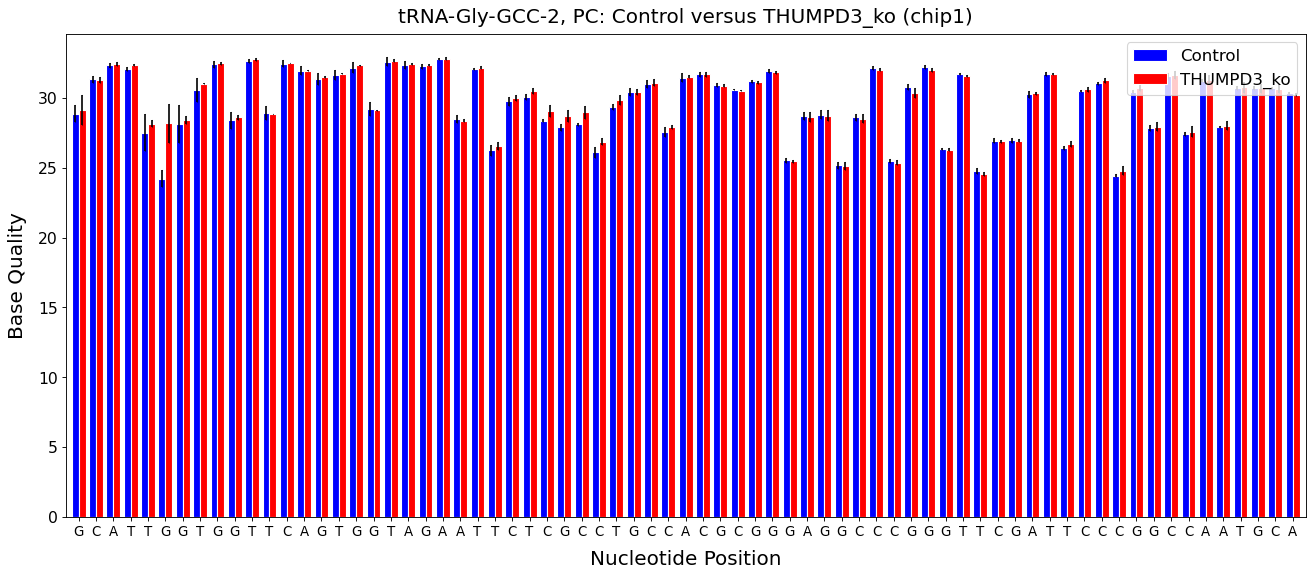

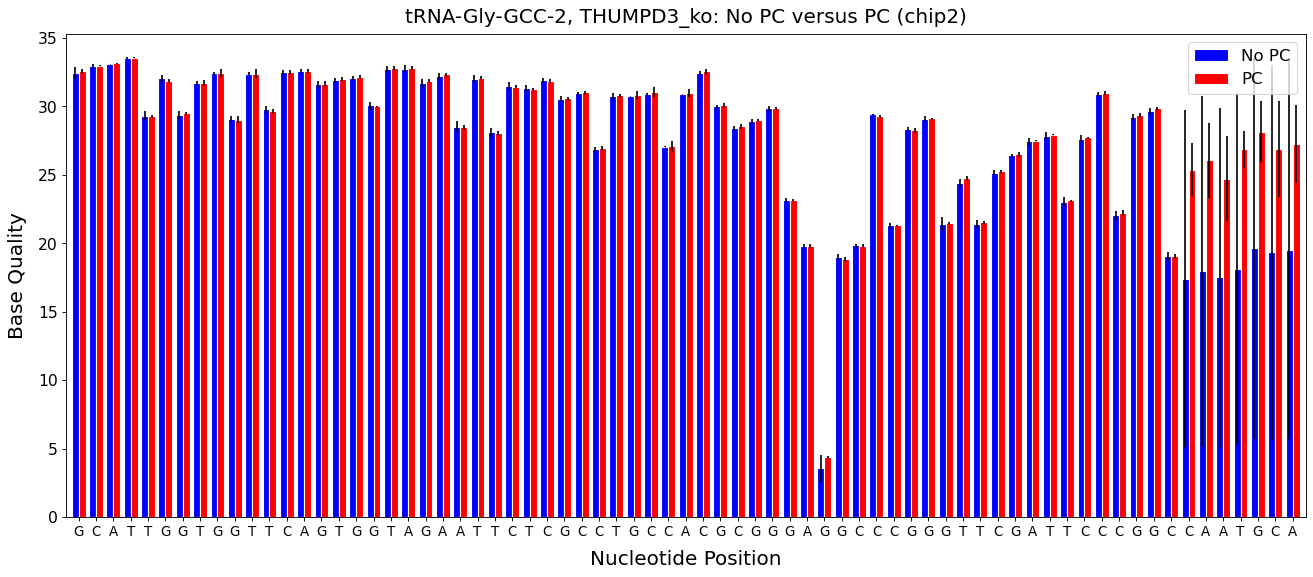

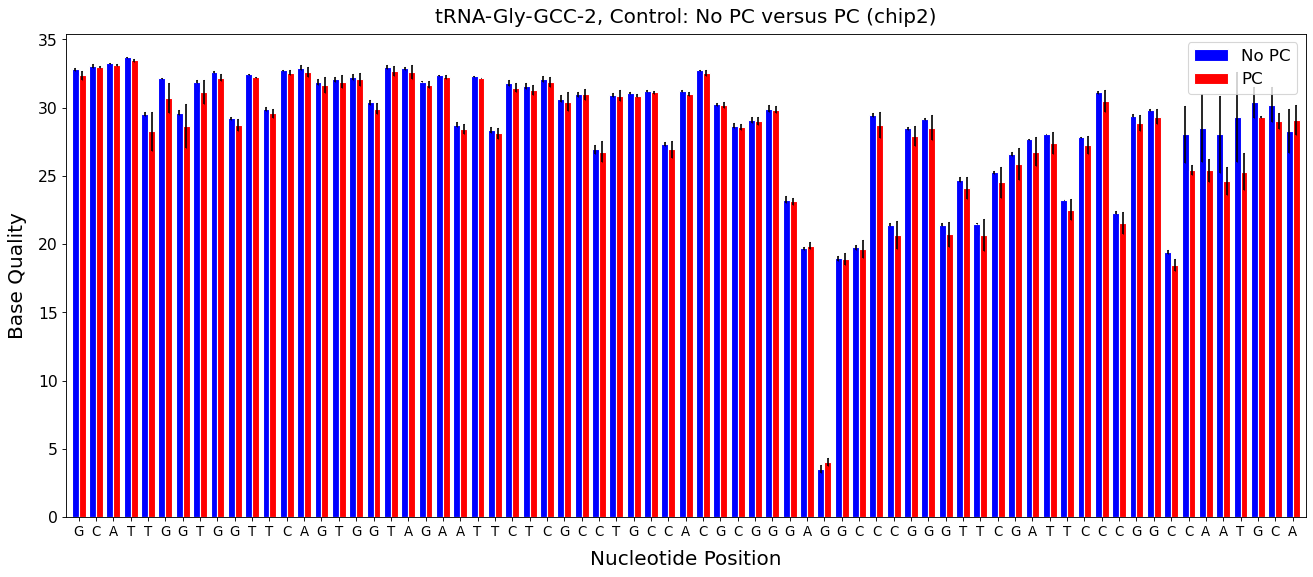

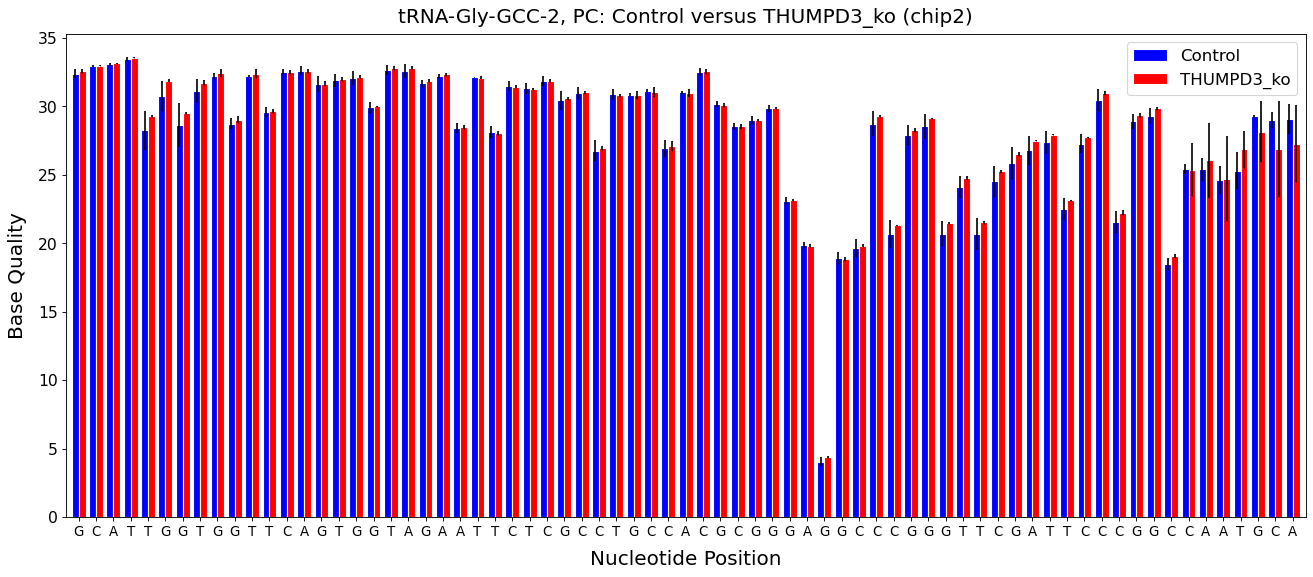

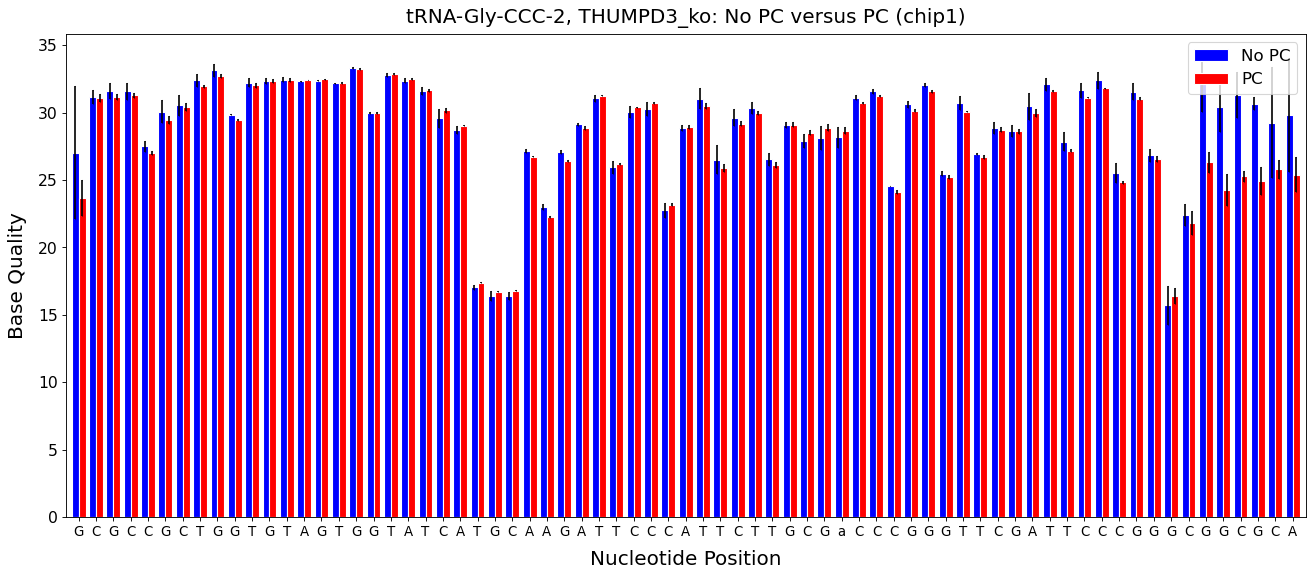

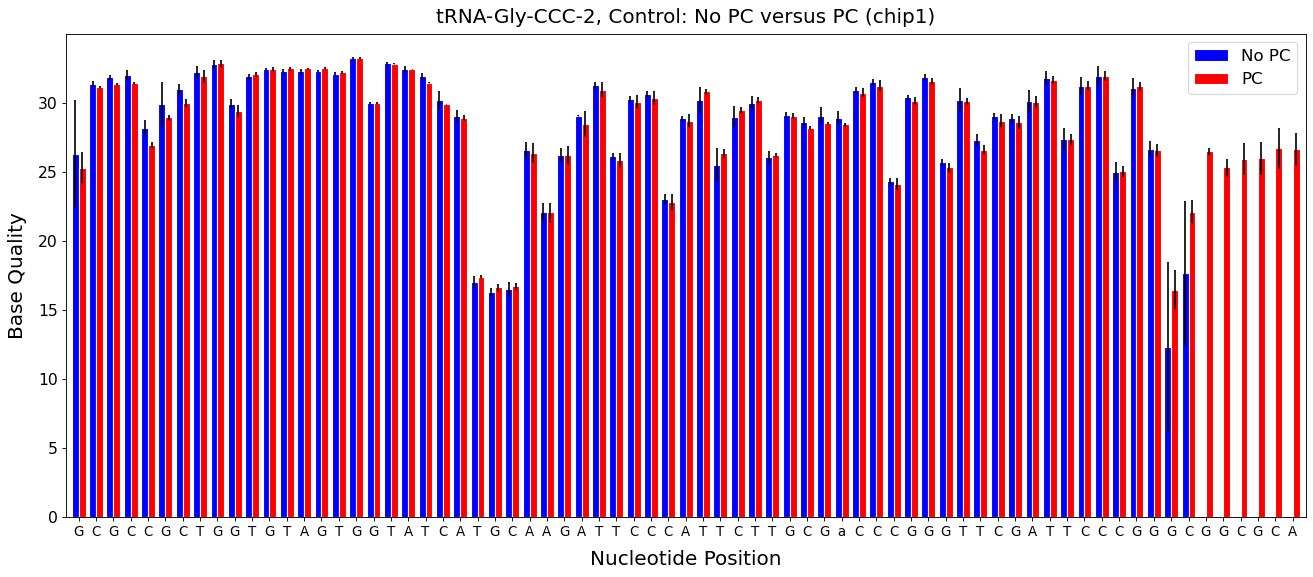

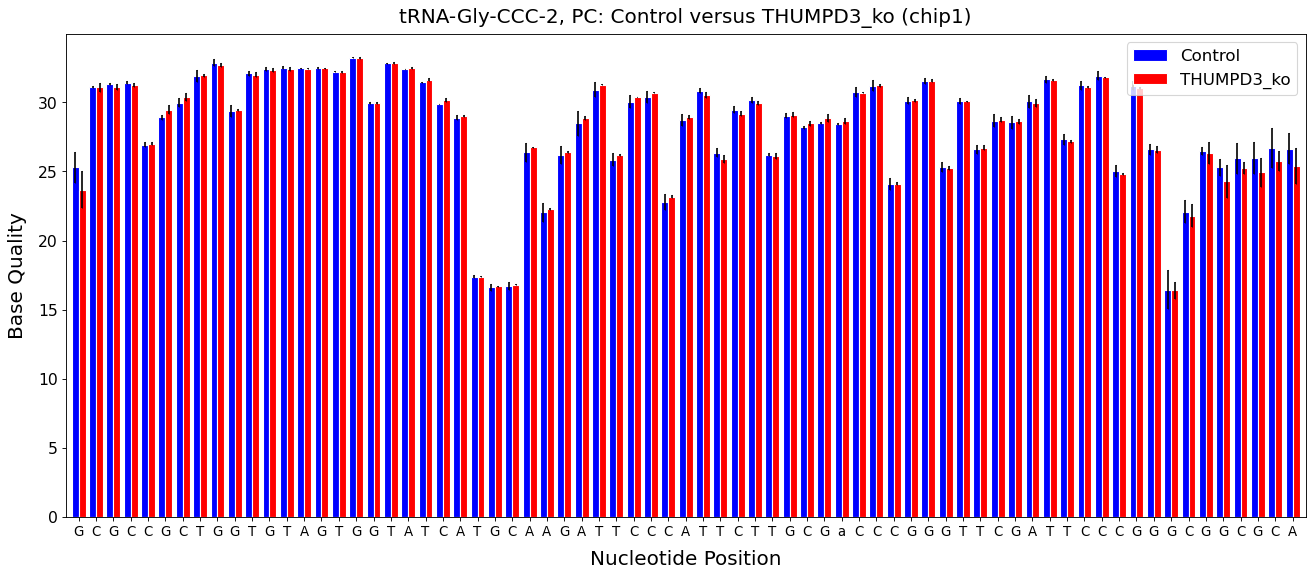

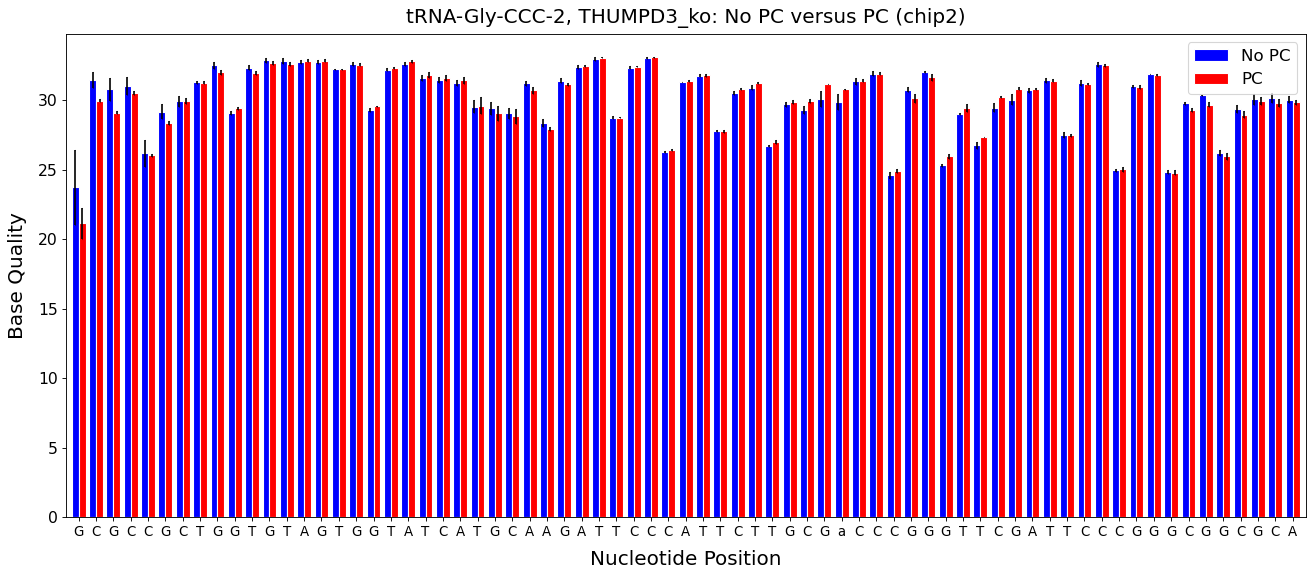

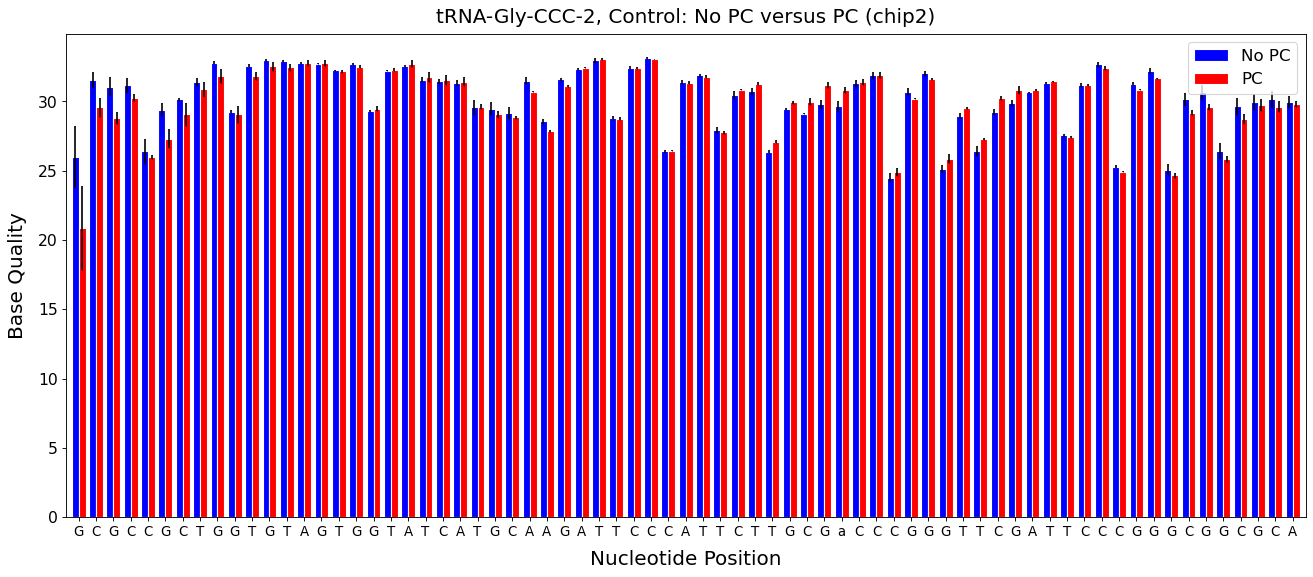

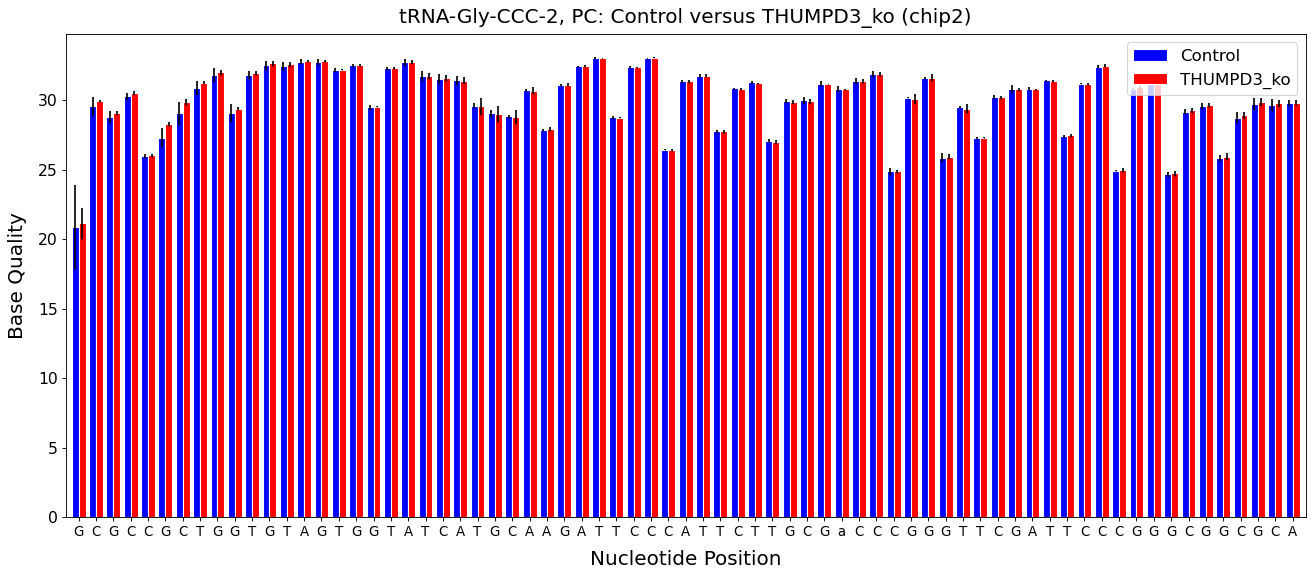

In [11]:
# plot base quality

# create a loop to summarise and plot for all tRNA isodecoders

# lists
batch_list = ['chip1','chip2']
sample_list = ['01','02','03','04','05','06','07','08','09','10','11','12']
tRNA_list = ['tRNA-Gly-GCC-2','tRNA-Gly-CCC-2']

# create dictionary 
df = {}
df_tRNA = {}
df_tRNA_sum = {}
df_tRNA_plot = {}

# Loop
for tRNA_type in tRNA_list:
    
#     for each tRNA isodecoder type, create a new dictionary within the big dictionary
    df_tRNA[tRNA_type] = {}
    df_tRNA_sum[tRNA_type] = {}
    
    for batch_number in batch_list:
        for sample_number in sample_list:
            
            # import bam-readcount output
            df['{}.01{}'.format(batch_number,sample_number)] = pd.read_csv('{}.01{}.bam_readcount.filtered1.tsv'.format(batch_number,sample_number), sep='\t')
            
            # save the information for each tRNA isodecoder
            df_tRNA[tRNA_type]['{}.01{}'.format(batch_number,sample_number)] = df['{}.01{}'.format(batch_number,sample_number)][df['{}.01{}'.format(batch_number,sample_number)]['chrom'] == tRNA_type]
            
            # create list within each tRNA isodecoder type dictionary for error rate and sequencing depth
            df_tRNA_sum[tRNA_type]['{}.01{}'.format(batch_number,sample_number)] = []
        
            # loop over each nucleotide position, append error rate and sequencing depth information
            for i in range(71):
            
                if (i+40) in df_tRNA[tRNA_type]['{}.01{}'.format(batch_number,sample_number)]['position'].values:
                    
                    df_tRNA_sum[tRNA_type]['{}.01{}'.format(batch_number,sample_number)].append((df_tRNA[tRNA_type]['{}.01{}'.format(batch_number,sample_number)][df_tRNA[tRNA_type]['{}.01{}'.format(batch_number,sample_number)]['position'] == i+40 ]['count']
                                                                                               * df_tRNA[tRNA_type]['{}.01{}'.format(batch_number,sample_number)][df_tRNA[tRNA_type]['{}.01{}'.format(batch_number,sample_number)]['position'] == i+40 ]['avg_basequality']).sum() / 
                                                                                               df_tRNA[tRNA_type]['{}.01{}'.format(batch_number,sample_number)][df_tRNA[tRNA_type]['{}.01{}'.format(batch_number,sample_number)]['position'] == i+40 ]['depth'].iloc[0])
            
                else:
                
                    df_tRNA_sum[tRNA_type]['{}.01{}'.format(batch_number,sample_number)].append(0)
    
    # convert each list to dataframe and save into csv file
#     df_tRNA_sum_save = pd.DataFrame(df_tRNA_sum[tRNA_type])
#     df_tRNA_depth_save = pd.DataFrame(df_tRNA_depth[tRNA_type])
#     df_tRNA_sum_save.to_csv('{}_sum.csv'.format(tRNA_type))
#     df_tRNA_depth_save.to_csv('{}_depth.csv'.format(tRNA_type))

# make plots
for tRNA_type in tRNA_list:
    for batch_number in batch_list:
        
        # group vaf information of each isodecoder type by experimental groups: Control: No PC vs PC; THUMPD3_ko: No PC vs PC
        df_tRNA_plot[tRNA_type] = {}
        df_tRNA_plot[tRNA_type]['Control'] = pd.DataFrame()
        df_tRNA_plot[tRNA_type]['Control']['{}.0101'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0101'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['Control']['{}.0103'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0103'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['Control']['{}.0105'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0105'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['Control']['mean'] = df_tRNA_plot[tRNA_type]['Control'].mean(axis=1)
        df_tRNA_plot[tRNA_type]['Control']['STD'] = df_tRNA_plot[tRNA_type]['Control'].std(axis=1)

        df_tRNA_plot[tRNA_type]['PC'] = pd.DataFrame()
        df_tRNA_plot[tRNA_type]['PC']['{}.0102'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0102'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['PC']['{}.0104'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0104'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['PC']['{}.0106'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0106'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['PC']['mean'] = df_tRNA_plot[tRNA_type]['PC'].mean(axis=1)
        df_tRNA_plot[tRNA_type]['PC']['STD'] = df_tRNA_plot[tRNA_type]['PC'].std(axis=1)

        df_tRNA_plot[tRNA_type]['Control_THUMPD3_ko'] = pd.DataFrame()
        df_tRNA_plot[tRNA_type]['Control_THUMPD3_ko']['{}.0107'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0107'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['Control_THUMPD3_ko']['{}.0109'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0109'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['Control_THUMPD3_ko']['{}.0111'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0111'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['Control_THUMPD3_ko']['mean'] = df_tRNA_plot[tRNA_type]['Control_THUMPD3_ko'].mean(axis=1)
        df_tRNA_plot[tRNA_type]['Control_THUMPD3_ko']['STD'] = df_tRNA_plot[tRNA_type]['Control_THUMPD3_ko'].std(axis=1)

        df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko'] = pd.DataFrame()
        df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko']['{}.0108'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0108'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko']['{}.0110'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0110'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko']['{}.0112'.format(batch_number)] = df_tRNA_sum[tRNA_type]['{}.0112'.format(batch_number)]
        df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko']['mean'] = df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko'].mean(axis=1)
        df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko']['STD'] = df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko'].std(axis=1)
    
# Plot 1
        # plot THUMPD3_ko
        barWidth = 0.4
        plt.figure(figsize=(20, 8), dpi=80)
        plt.rc('legend', fontsize=15)    # legend fontsize
        plt.rc('ytick', labelsize=14)    # legend fontsize
        plt.rc('xtick', labelsize=12) 
        plt.rcParams['axes.xmargin'] = 0.005
        plt.rcParams['axes.titlepad'] = 10 

        # Set position of bar on X axis
        r1 = np.arange(71)
        r2 = [x + barWidth for x in r1]

        # Make the plot
        plt.bar(r1,  df_tRNA_plot[tRNA_type]['Control_THUMPD3_ko']['mean'], yerr= df_tRNA_plot[tRNA_type]['Control_THUMPD3_ko']['STD'], color='blue', width=barWidth, edgecolor='white', label='No PC', capsize=0.2)
        plt.bar(r2,  df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko']['mean'], yerr= df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko']['STD'], color='red', width=barWidth, edgecolor='white', label='PC',capsize=0.2)

        # Add xticks on the middle of the group bars
        plt.xlabel("Nucleotide Position",fontsize=18,labelpad=10)
        plt.ylabel("Base Quality",fontsize=18,labelpad=10)
        plt.title("{}, THUMPD3_ko: No PC versus PC ({})".format(tRNA_type,batch_number), fontsize=18)

        plt.xticks([r + 0.2 for r in range(71)], tRNA_sequence[tRNA_type])
        
#         if tRNA_type == 'tRNA-Gly-CCC-2':
#             plt.ylim(0,0.65)
            
#         if tRNA_type == 'tRNA-Gly-GCC-2':
#             plt.ylim(0,0.5)

        # Create legend & Show graphic
        plt.legend(loc='upper right')
        plt.savefig('{}_THUMPD3_ko_{}_base_quality.png'.format(tRNA_type,batch_number),dpi=500, bbox_inches='tight')
        plt.show()

# Plot 2
        # plot Control
        barWidth = 0.4
        plt.figure(figsize=(20, 8), dpi=80)
        plt.rc('legend', fontsize=15)    # legend fontsize
        plt.rc('ytick', labelsize=14)    # legend fontsize
        plt.rc('xtick', labelsize=12) 
        plt.rcParams['axes.xmargin'] = 0.005
        plt.rcParams['axes.titlepad'] = 10 

        # Set position of bar on X axis
        r1 = np.arange(71)
        r2 = [x + barWidth for x in r1]

        # Make the plot
        plt.bar(r1,  df_tRNA_plot[tRNA_type]['Control']['mean'], yerr= df_tRNA_plot[tRNA_type]['Control']['STD'], color='blue', width=barWidth, edgecolor='white', label='No PC', capsize=0.2)
        plt.bar(r2,  df_tRNA_plot[tRNA_type]['PC']['mean'], yerr= df_tRNA_plot[tRNA_type]['PC']['STD'], color='red', width=barWidth, edgecolor='white', label='PC',capsize=0.2)

        # Add xticks on the middle of the group bars
        plt.xlabel("Nucleotide Position",fontsize=18,labelpad=10)
        plt.ylabel("Base Quality",fontsize=18,labelpad=10)
        plt.title("{}, Control: No PC versus PC ({})".format(tRNA_type,batch_number), fontsize=18)

        plt.xticks([r + 0.2 for r in range(71)], tRNA_sequence[tRNA_type])
        
#         if tRNA_type == 'tRNA-Gly-CCC-2':
#             plt.ylim(0,0.65)
            
#         if tRNA_type == 'tRNA-Gly-GCC-2':
#             plt.ylim(0,0.5)

        # Create legend & Show graphic
        plt.legend(loc='upper right')
        plt.savefig('{}_Control_{}_base_quality.png'.format(tRNA_type,batch_number),dpi=500, bbox_inches='tight')
        plt.show()
        
# PLOT 3
        # plot Control versus THUMPD3_ko
        barWidth = 0.4
        plt.figure(figsize=(20, 8), dpi=80)
        plt.rc('legend', fontsize=15)    # legend fontsize
        plt.rc('ytick', labelsize=14)    # legend fontsize
        plt.rc('xtick', labelsize=12) 
        plt.rcParams['axes.xmargin'] = 0.005
        plt.rcParams['axes.titlepad'] = 10 

        # Set position of bar on X axis
        r1 = np.arange(71)
        r2 = [x + barWidth for x in r1]

        # Make the plot
        plt.bar(r1,  df_tRNA_plot[tRNA_type]['PC']['mean'], yerr= df_tRNA_plot[tRNA_type]['PC']['STD'], color='blue', width=barWidth, edgecolor='white', label='Control', capsize=0.2)
        plt.bar(r2,  df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko']['mean'], yerr= df_tRNA_plot[tRNA_type]['PC_THUMPD3_ko']['STD'], color='red', width=barWidth, edgecolor='white', label='THUMPD3_ko',capsize=0.2)

        # Add xticks on the middle of the group bars
        plt.xlabel("Nucleotide Position",fontsize=18,labelpad=10)
        plt.ylabel("Base Quality",fontsize=18,labelpad=10)
        plt.title("{}, PC: Control versus THUMPD3_ko ({})".format(tRNA_type,batch_number), fontsize=18)

        plt.xticks([r + 0.2 for r in range(71)], tRNA_sequence[tRNA_type])
        
#         if tRNA_type == 'tRNA-Gly-CCC-2':
#             plt.ylim(0,0.65)
            
#         if tRNA_type == 'tRNA-Gly-GCC-2':
#             plt.ylim(0,0.5)

        # Create legend & Show graphic
        plt.legend(loc='upper right')
        plt.savefig('{}_Control_THUMPD3_ko_{}_base_quality.png'.format(tRNA_type,batch_number),dpi=500, bbox_inches='tight')
        plt.show()
        
        
                    
        